In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.cluster import KMeans

from sklearn.metrics import pairwise_distances

from sklearn.metrics import silhouette_score, silhouette_samples


# 1. Data preparation

In [2]:
dataset = pd.read_csv("df_audio_features_5000.csv")

In [3]:
dataset.columns = dataset.columns.str.strip()

In [4]:
dataset.iloc[:,0] = dataset.iloc[:,0].str.strip()
dataset.iloc[:,1] = dataset.iloc[:,1].str.strip()

In [5]:
dataset.set_index(dataset.columns[:2].tolist(), inplace=True)
dataset.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [6]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', \
            'time_signature']

In [7]:
audio_features_df = dataset[features]
audio_features_df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
name,artist,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,4
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,4


In [8]:
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5235 entries, ('Se Eu Quiser Falar Com Deus', 'Gilberto Gil') to ('Ravel: Boléro, M. 81', 'Maurice Ravel')
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   key               5235 non-null   int64  
 3   loudness          5235 non-null   float64
 4   mode              5235 non-null   int64  
 5   speechiness       5235 non-null   float64
 6   acousticness      5235 non-null   float64
 7   instrumentalness  5235 non-null   float64
 8   liveness          5235 non-null   float64
 9   valence           5235 non-null   float64
 10  tempo             5235 non-null   float64
 11  time_signature    5235 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 807.5+ KB


In [9]:
audio_features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

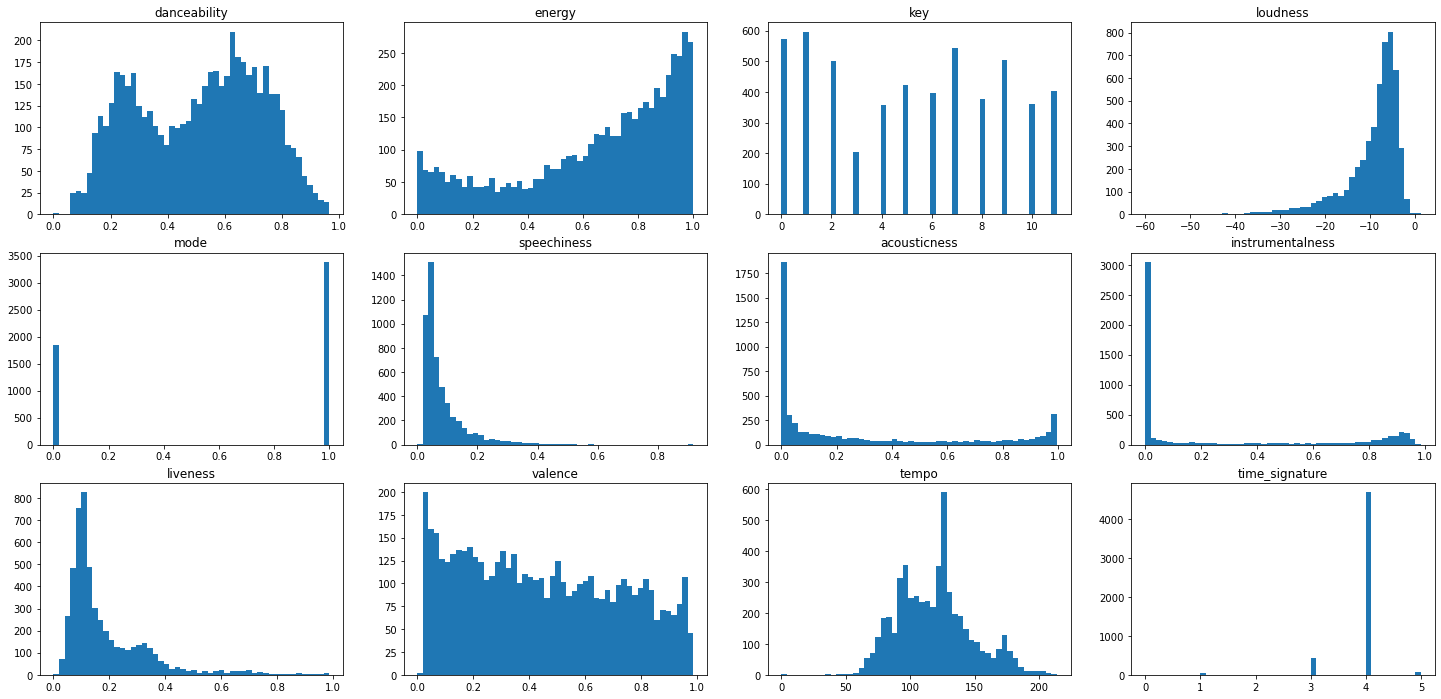

In [10]:
plt.figure(figsize=(25, 12))
for feature, i in zip(audio_features_df.columns, range(len(audio_features_df.columns))):
  plt.subplot(3,4,i+1)

  plt.hist(audio_features_df[feature], bins=50)
  plt.title(f'{feature}')
  # plt.show()


In [11]:
# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

In [12]:
audio_features_corr_df = pd.DataFrame(audio_features_df.corr(), index=audio_features_df.columns, columns=audio_features_df.columns)
audio_features_corr_df.style.background_gradient(axis=None, cmap="OrRd")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
danceability,1.000000,0.040491,0.002152,0.358328,-0.088908,0.036121,-0.111151,-0.573800,-0.032534,0.680097,-0.009585,0.215498
energy,0.040491,1.000000,0.029702,0.786860,-0.008461,0.303940,-0.850469,-0.169923,0.170642,0.159101,0.211617,0.162435
key,0.002152,0.029702,1.000000,0.027082,-0.155697,0.027547,-0.024794,-0.016775,0.025193,-0.018109,-0.002370,0.007796
loudness,0.358328,0.786860,0.027082,1.000000,-0.030855,0.233609,-0.697709,-0.471786,0.134788,0.335754,0.213228,0.215875
mode,-0.088908,-0.008461,-0.155697,-0.030855,1.000000,-0.041282,0.028854,-0.003017,-0.009712,0.005966,0.004739,-0.013039
speechiness,0.036121,0.303940,0.027547,0.233609,-0.041282,1.000000,-0.265754,-0.064754,0.081963,-0.011395,0.064255,0.060871
acousticness,-0.111151,-0.850469,-0.024794,-0.697709,0.028854,-0.265754,1.000000,0.194941,-0.103144,-0.130646,-0.187994,-0.163980
instrumentalness,-0.573800,-0.169923,-0.016775,-0.471786,-0.003017,-0.064754,0.194941,1.000000,-0.051664,-0.500584,-0.071945,-0.160122
liveness,-0.032534,0.170642,0.025193,0.134788,-0.009712,0.081963,-0.103144,-0.051664,1.000000,0.007272,0.036370,0.025039
valence,0.680097,0.159101,-0.018109,0.335754,0.005966,-0.011395,-0.130646,-0.500584,0.007272,1.000000,0.098783,0.189048


<AxesSubplot:>

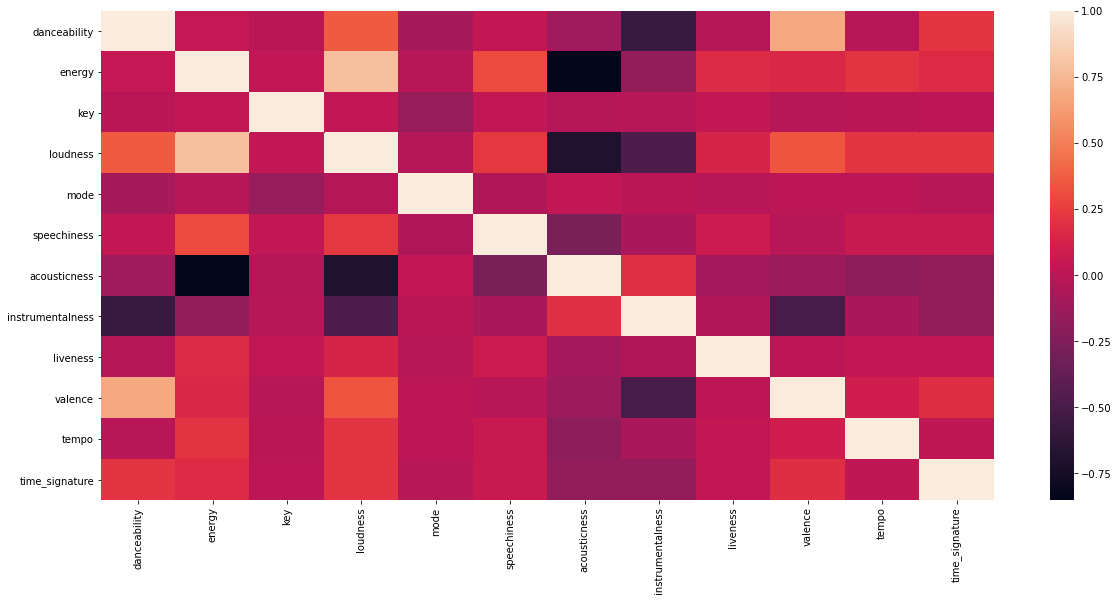

In [13]:
plt.subplots(figsize=(20, 9))
sns.heatmap(audio_features_corr_df)

# 2. Modelling

## 2.1. Data scaling (potentially, other transformations)

## 2.2. K-Means exploration of clusters (elbow method, silhouette coefficient…)

### Inertias

In [14]:
def scalers_inertias(max_n_clusters, scalers, df):
  scalers_inertias = []
  for scaler in scalers:
    inertias = []
    for i in range(1, max_n_clusters):
      kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
      sc = scaler
      X = sc.fit_transform(df)
      y_kmeans = kmeans.fit_predict(X)
      inertias.append(kmeans.inertia_)
    scalers_inertias.append(inertias)
  return scalers_inertias

In [15]:
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()]

In [16]:
scalers_inertias_data = scalers_inertias(30, scalers, audio_features_df)

In [17]:
def elbow_method_plots(max_n_clusters, scalers_inertias_data, scalers):
  plt.subplots(figsize=(12, 8))
  for inertias_data in scalers_inertias_data:  
    plt.plot(range(1, max_n_clusters), inertias_data, marker='o')

  plt.title('The Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  labels = []
  for scaler in scalers:
    labels.append(str(scaler).strip('()'))
  plt.legend(labels)
  plt.show()

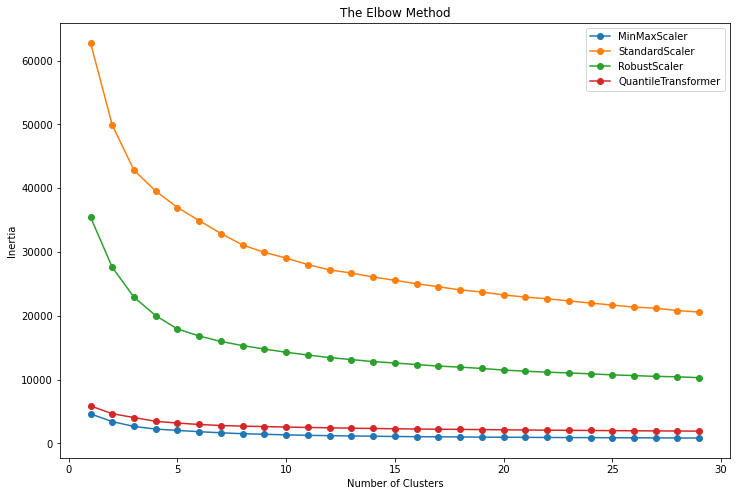

In [18]:
elbow_method_plots(30, scalers_inertias_data, scalers)

In [19]:
def inertias(max_n_clusters, scaler, df):
  inertias = []
  for i in range(1, max_n_clusters):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    sc = scaler
    X = sc.fit_transform(df)
    y_kmeans = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
  return inertias

In [20]:
min_max_sc_inertias_data = inertias(30, MinMaxScaler(), audio_features_df)

In [21]:
def elbow_method_plot(max_n_clusters, inertias_data):
  plt.subplots(figsize=(12, 8))
  plt.plot(range(1, max_n_clusters), inertias_data, marker='o')
  plt.title('The Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Inertia')
  plt.show()

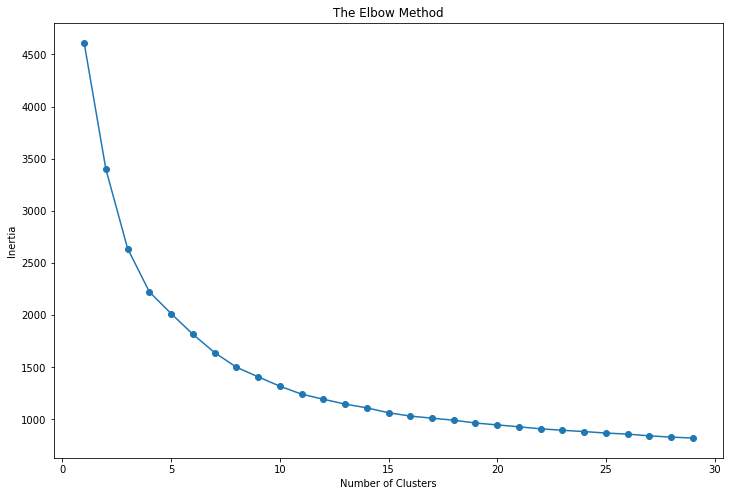

In [22]:
elbow_method_plot(30, min_max_sc_inertias_data)

In [23]:
quant_trans_inertias_data = inertias(30, QuantileTransformer(), audio_features_df)

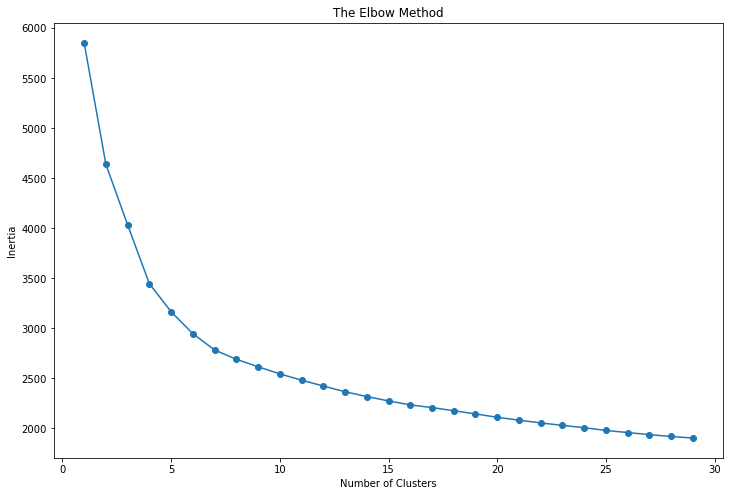

In [24]:
elbow_method_plot(30, quant_trans_inertias_data)

### Silhouettes Scores

In [25]:
def silhouette_scores(max_n_clusters, scaler, df):
  silhouette_scores = []
  for i in range(2, max_n_clusters):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    sc = scaler
    X = sc.fit_transform(df)
    y_kmeans = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_kmeans))
  return silhouette_scores

In [26]:
std_sc_silhouette_scores_data = silhouette_scores(30, StandardScaler(), audio_features_df)

In [27]:
def silhouette_scores_plot(max_n_clusters, silhouette_scores_data):
  plt.subplots(figsize=(12, 8))
  plt.plot(range(2, max_n_clusters), silhouette_scores_data, marker='o')
  plt.title('')
  plt.xlabel('Number of Clusters')
  plt.ylabel('silhouettes scores')
  plt.show()

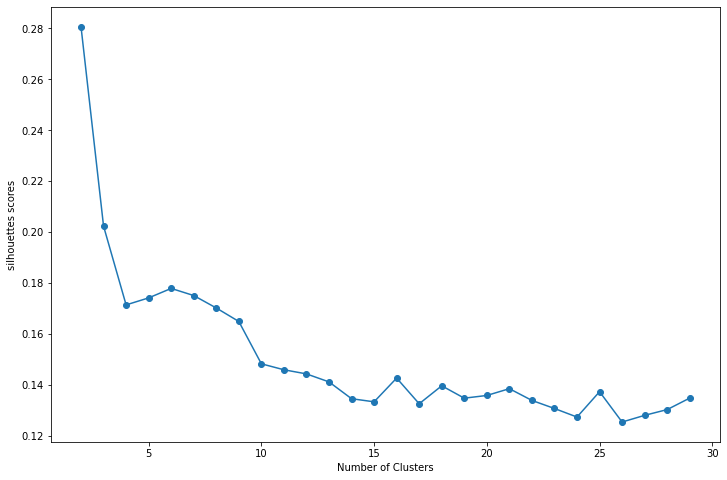

In [28]:
silhouette_scores_plot(30, std_sc_silhouette_scores_data)

In [29]:
def scalers_silhouettes_scores(max_n_clusters, scalers, df):
  silhouettes_scores = []
  for scaler in scalers:
    scores = []
    for i in range(2, max_n_clusters):
      kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
      sc = scaler
      X = sc.fit_transform(df)
      y_kmeans = kmeans.fit_predict(X)
      scores.append(silhouette_score(X, y_kmeans))
    silhouettes_scores.append(scores)
  return silhouettes_scores

In [30]:
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()]

In [31]:
scalers_silhouettes_scores_data = scalers_silhouettes_scores(30, scalers, audio_features_df)

In [32]:
def silhouettes_scores_plots(max_n_clusters, scalers_silhouettes_scores_data, scalers):
  plt.subplots(figsize=(12, 8))
  for silhouette_scores_data in scalers_silhouettes_scores_data:  
    plt.plot(range(2, max_n_clusters), silhouette_scores_data, marker='o')

  plt.title('The Silhouettes Scores')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Scores')
  labels = []
  for scaler in scalers:
    labels.append(str(scaler).strip('()'))
  plt.legend(labels)
  plt.show()

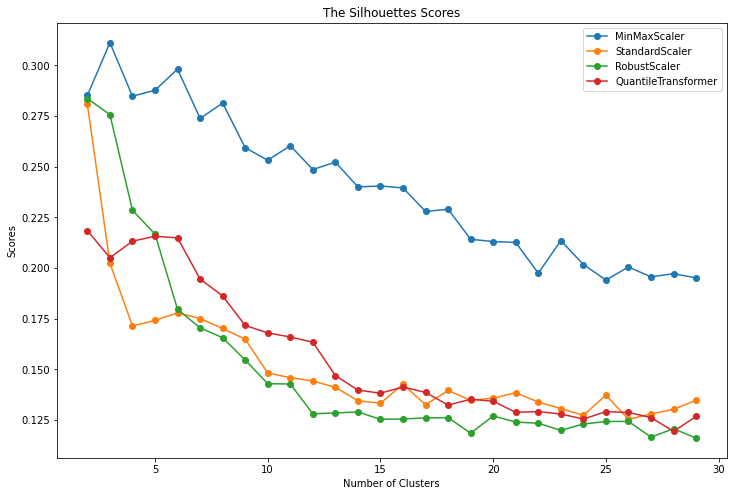

In [33]:
silhouettes_scores_plots(30, scalers_silhouettes_scores_data, scalers)

In [34]:
scalers

[MinMaxScaler(), StandardScaler(), RobustScaler(), QuantileTransformer()]

In [35]:
scores_sums = []
for i in range(len(scalers_silhouettes_scores_data)):
  scores_sums.append(sum(scalers_silhouettes_scores_data[i]))

scores_sums

[6.7067731724144055, 4.234636477740552, 4.1865016035853, 4.364960552406171]

In [36]:
sc = scalers[scores_sums.index(max(scores_sums))]
sc

MinMaxScaler()

For n_clusters = 5 The average silhouette_score is : 0.2876345189324552
For n_clusters = 6 The average silhouette_score is : 0.2980778828761328
For n_clusters = 7 The average silhouette_score is : 0.2737575337719201
For n_clusters = 8 The average silhouette_score is : 0.28133654474381403
For n_clusters = 9 The average silhouette_score is : 0.25928117477054674
For n_clusters = 10 The average silhouette_score is : 0.25314805532688733


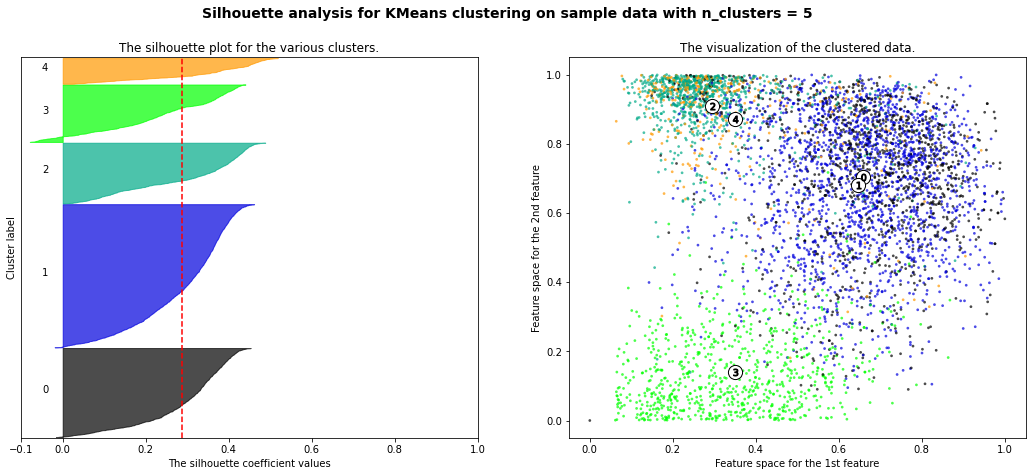

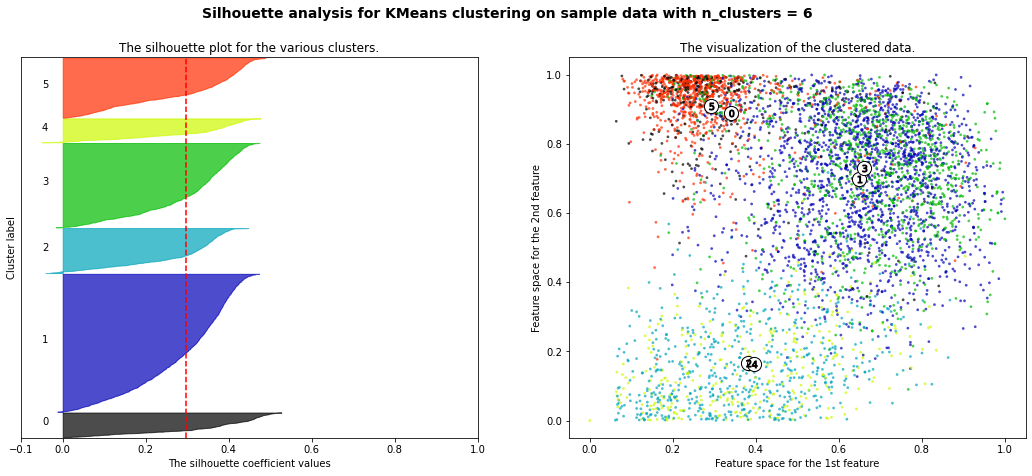

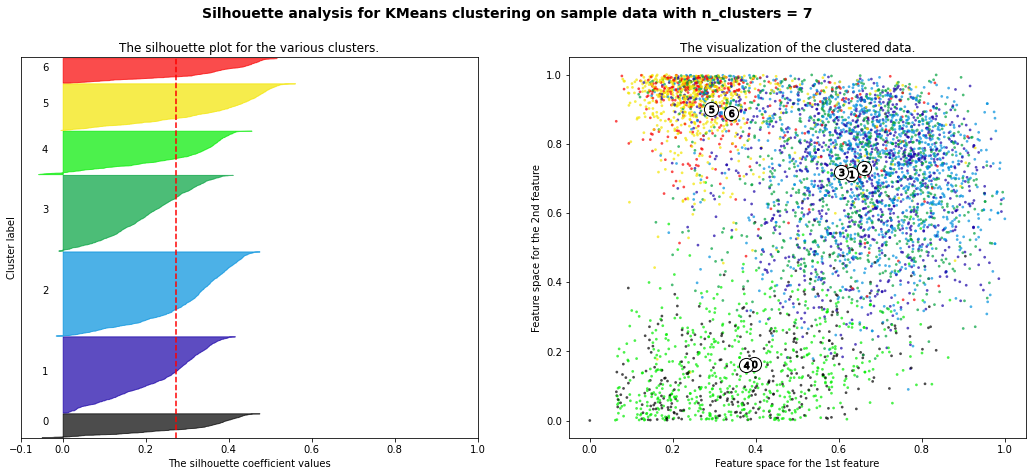

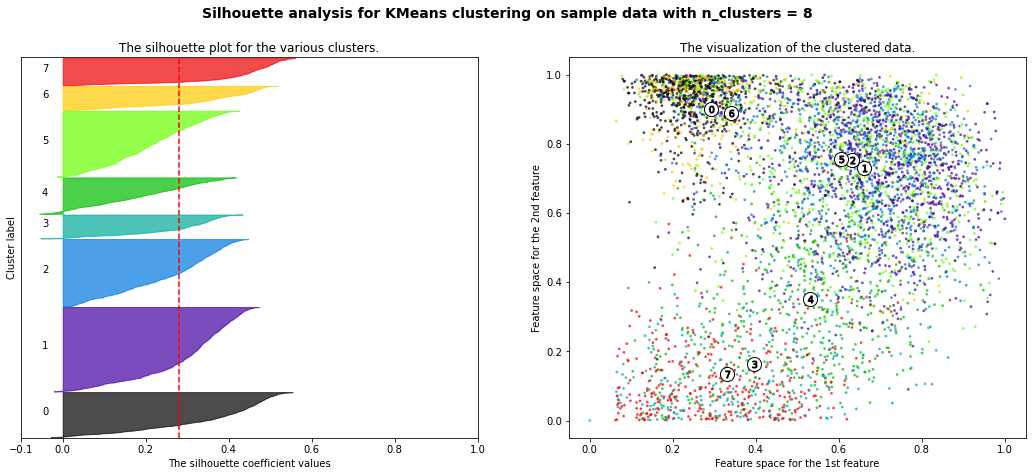

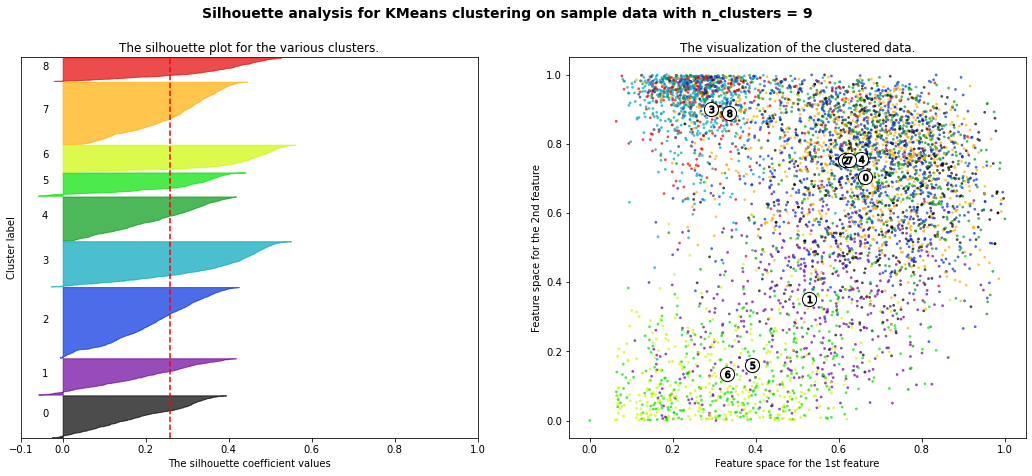

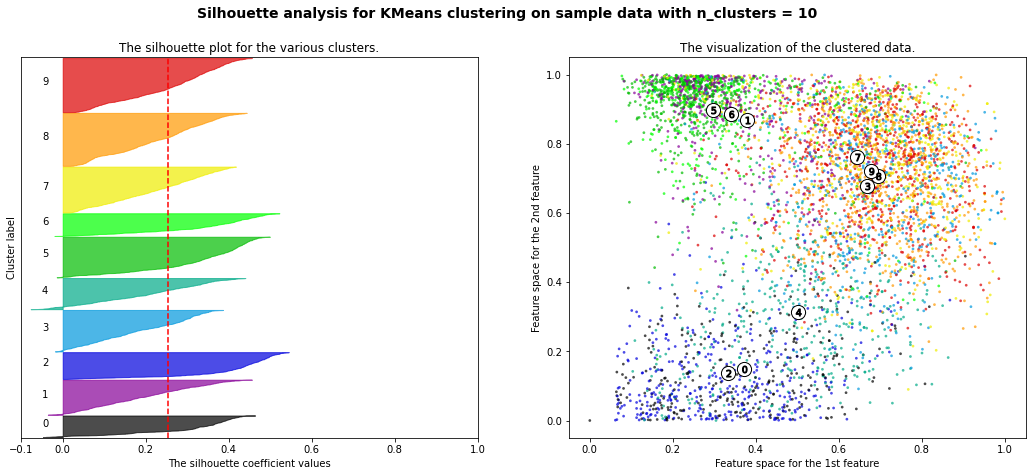

In [37]:
import matplotlib.cm as cm


silhouette_avgs = []
range_n_clusters = [5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    sc = sc
    X = sc.fit_transform(audio_features_df)
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    # clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    # cluster_labels = clusterer.fit_predict(X)
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
    # sc = MinMaxScaler()
    # X = sc.fit_transform(audio_features_df)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [38]:
range_n_clusters[silhouette_avgs.index(max(silhouette_avgs))]

6

In [39]:
n_clusters = range_n_clusters[silhouette_avgs.index(max(silhouette_avgs))]

In [40]:
centers = []
for scaler in scalers:
  kmeans = KMeans(n_clusters= n_clusters, init='k-means++', random_state=0)
  scaler = scaler
  X = scaler.fit_transform(audio_features_df)
  y_kmeans = kmeans.fit_predict(X)
  centers.append(kmeans.cluster_centers_)

In [41]:
scalers_centroids_eucl_dists = []
for scaler in scalers:
  scalers_centroids_eucl_dists.append(pd.DataFrame(pairwise_distances(centers[scalers.index(scaler)])))

In [42]:
scaler_names = []
for scaler in scalers:
  scaler_names.append(str(scaler).strip('()'))

scaler_names

['MinMaxScaler', 'StandardScaler', 'RobustScaler', 'QuantileTransformer']

In [43]:
def heatmap_plots(scalers_centroids_dists, scaler_names, n_clusters):
  plt.figure(figsize=(20, 10))
  for i in range(len(scalers_centroids_dists)):

    if i < 2:
      plt.subplot(2,2, i + 1)

    else:
      plt.subplot(2,2, i + 1)

    plt.title(f'Euclidean Distance between {n_clusters} Cluster Centroids of ' + scaler_names[i] + ' Data')
    sns.heatmap(scalers_centroids_dists[i])

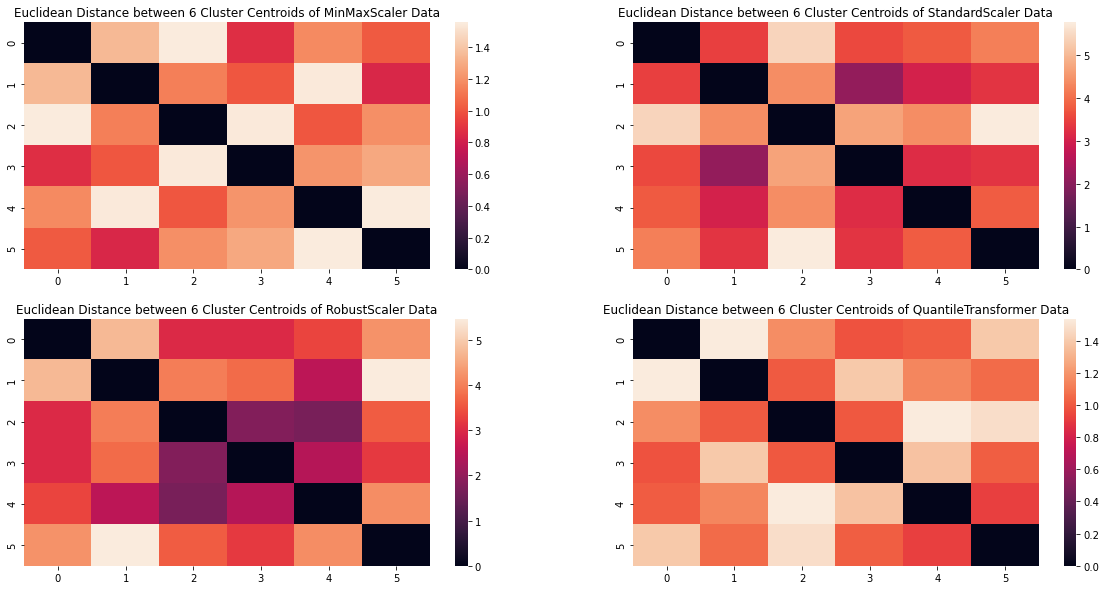

In [44]:
heatmap_plots(scalers_centroids_eucl_dists, scaler_names, n_clusters)

In [45]:
scalers_centroids_manh_dists = []
for scaler in scalers:
  scalers_centroids_manh_dists.append(pd.DataFrame(pairwise_distances(centers[scalers.index(scaler)], metric='manhattan')))

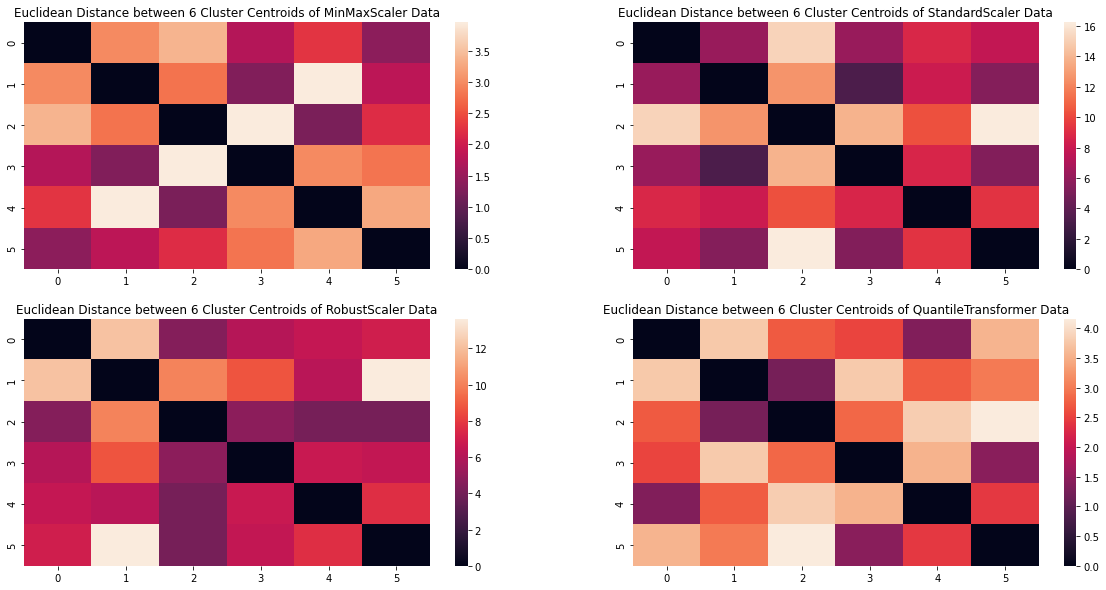

In [46]:
heatmap_plots(scalers_centroids_manh_dists, scaler_names, n_clusters)

## 2.3. K-Means final model

In [83]:
n_clusters

6

In [48]:
# scores_sums = []
# for i in range(len(scalers_silhouettes_scores_data)):
#   scores_sums.append(sum(scalers_silhouettes_scores_data[i]))

# scores_sums

In [84]:
# sc = scalers[scores_sums.index(max(scores_sums))]
sc

MinMaxScaler()

In [85]:
kmeans = KMeans(n_clusters= n_clusters, init='k-means++', random_state=0)
X = sc.fit_transform(audio_features_df)
y_kmeans = kmeans.fit_predict(X)
audio_features_df['cluster'] = y_kmeans + 1
audio_features_df.head()


<ipython-input-85-f9213bc0b358>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audio_features_df['cluster'] = y_kmeans + 1


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,4,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,4,2
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,4,2
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,4,5
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,4,5


# 3. Cluster exploration

In [86]:
audio_features_df.groupby(by='cluster').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,
1,0.282422,0.909313,4.835138,-7.835052,1.0,0.109079,0.010795,0.594710,0.202132,0.230978,121.573495,3.870036
2,0.628129,0.698669,4.817568,-7.026343,1.0,0.080438,0.221719,0.019438,0.187162,0.608145,121.031228,3.978690
3,0.381884,0.162097,5.612613,-19.938991,0.0,0.045971,0.899994,0.624278,0.143818,0.227704,104.472502,3.759760
4,0.639559,0.729309,6.021259,-6.329924,0.0,0.094832,0.174182,0.018719,0.196687,0.555215,121.213168,3.967687
5,0.369293,0.167239,4.931529,-19.183575,1.0,0.045588,0.909818,0.535299,0.151826,0.227421,108.410314,3.692675
6,0.328950,0.888810,6.335277,-7.942778,0.0,0.100789,0.020163,0.727373,0.197409,0.258413,123.023921,3.860058


In [87]:
audio_features_df.groupby(by='cluster').count()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,,
1,831,831,831,831,831,831,831,831,831,831,831,831
2,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924,1924
3,333,333,333,333,333,333,333,333,333,333,333,333
4,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176,1176
5,628,628,628,628,628,628,628,628,628,628,628,628
6,343,343,343,343,343,343,343,343,343,343,343,343


In [88]:
audio_features_df.drop('cluster', axis=1, inplace=True)

C:\Users\nabil\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


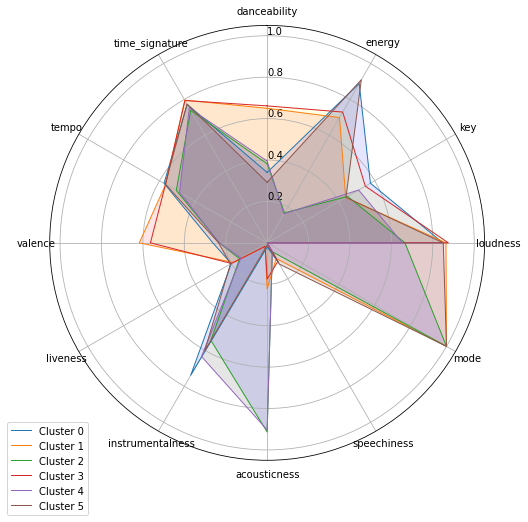

In [89]:
kmeans = KMeans(n_clusters= n_clusters, init='k-means++', random_state=0)
X = sc.fit_transform(audio_features_df)
kmeans.fit(X)
kmeans.cluster_centers_

cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = features
cl_pos
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
from math import pi
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=radar_df.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
ax.fill(angles, values, 'yellow', alpha=0.1)

# Ind5
values=radar_df.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 4")
ax.fill(angles, values, 'black', alpha=0.1)

# Ind6
values=radar_df.loc[5].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 5")
ax.fill(angles, values, 'black', alpha=0.1)

# Ind7
#values=radar_df.loc[6].drop('cluster').values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 6")
#ax.fill(angles, values, 'cyan', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

In [90]:
y_kmeans = kmeans.fit_predict(X)
audio_features_df['cluster'] = y_kmeans + 1
audio_features_df.head()

<ipython-input-90-404d680c5846>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  audio_features_df['cluster'] = y_kmeans + 1


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,4,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,4,2
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,4,2
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,4,3
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,4,3


In [91]:
def clusters_feature_distributions_plot(n_clusters, feature, df):
  for i in range(1, n_clusters + 1):
    df[df['cluster'] == i][feature].hist(bins=50, alpha=0.8)
    labels = []
    for j in range(1, n_clusters + 1):
      labels.append(f'cluster {j}')
    plt.legend(labels)
    plt.title(f'Distribution of {feature} for each Cluster')


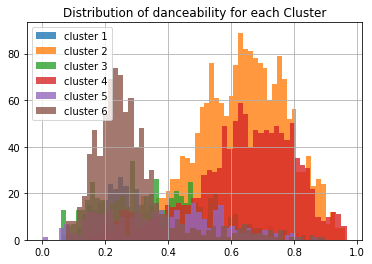

In [92]:
clusters_feature_distributions_plot(6, 'danceability', audio_features_df)

In [93]:
def clusters_features_distributions_plots(features, n_clusters, df):

  plt.figure(figsize=(20,25))
  for i, feature in zip(range(1, len(features) + 1), features):
    plt.subplot(6,2,i)
    for i in range(1, n_clusters + 1):
      # audio_features_df[audio_features_df['cluster'] == i][feature].hist(bins=50)
      plt.hist(df[df['cluster'] == i][feature], bins=50, alpha=0.7)
      labels = []
      for j in range(1, n_clusters + 1):
        labels.append(f'cluster {j}')
      plt.legend(labels)
      plt.title(f'Distribution of {feature.title()} for each Cluster')
  

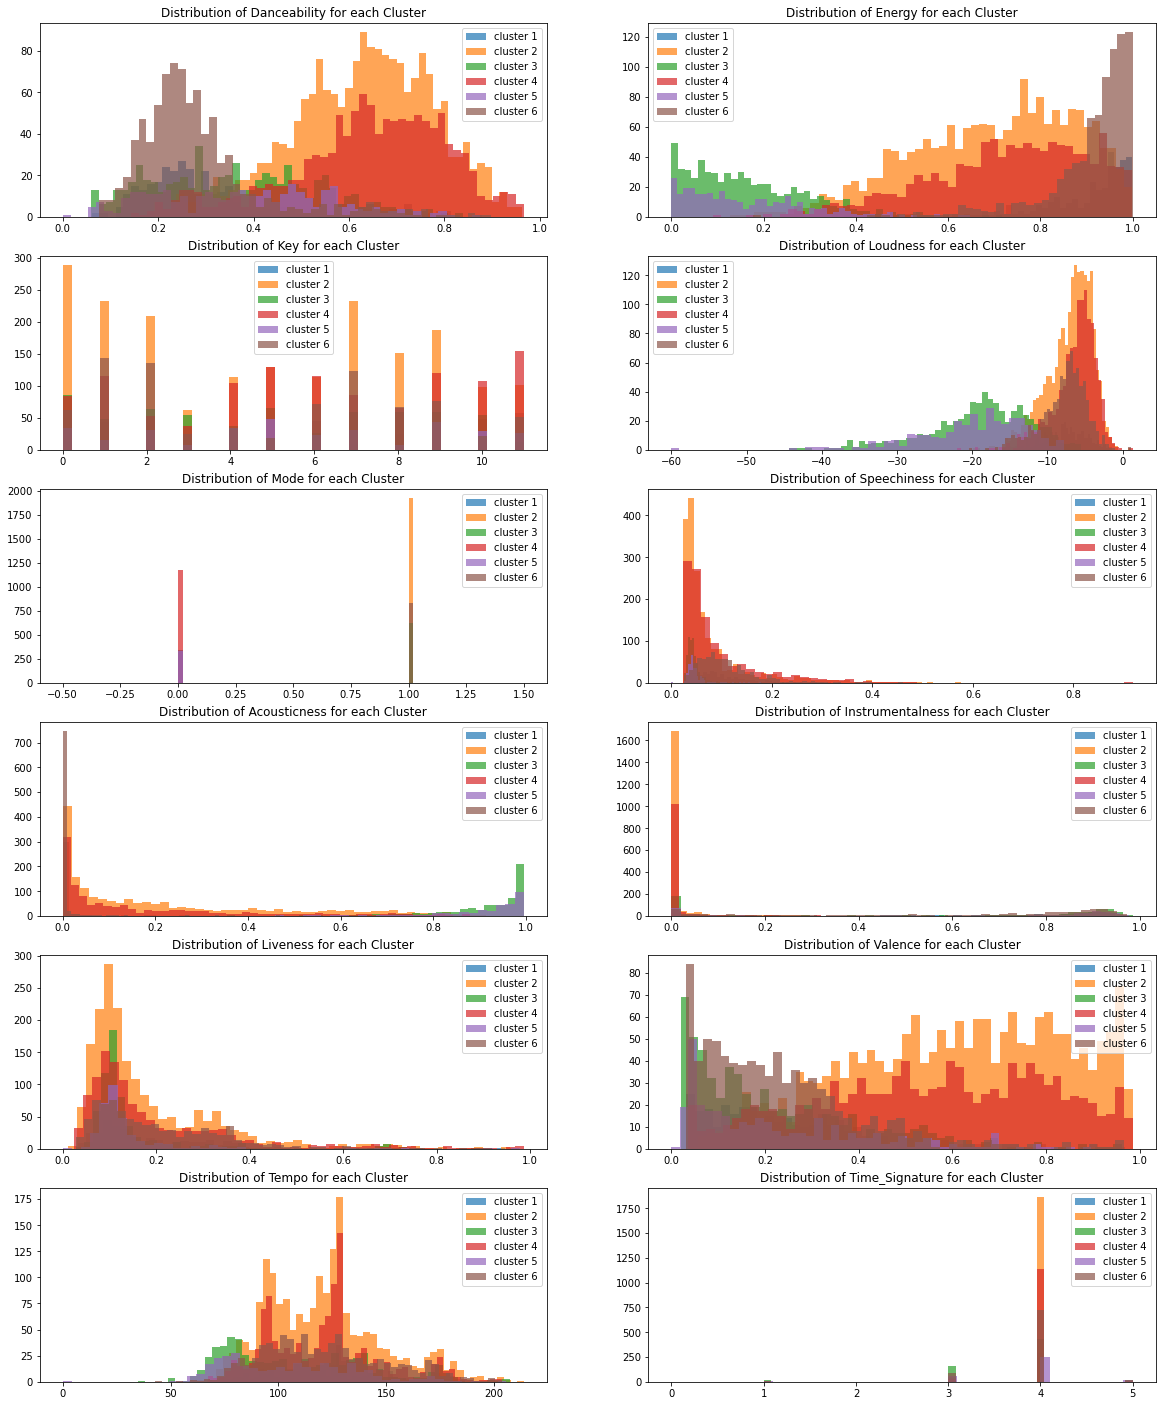

In [94]:
clusters_features_distributions_plots(features, n_clusters, audio_features_df)

In [95]:
def cluster_feature_distributions_plots(n_clusters, df, feature): 
  plt.figure(figsize=(20,12))
  for i in range(1, n_clusters + 1):
    plt.subplot(3,3,i)
    plt.hist(df[df['cluster'] == i][feature], bins=50)
    plt.title(f'Distribution of {feature.title()} in Cluster {i}')

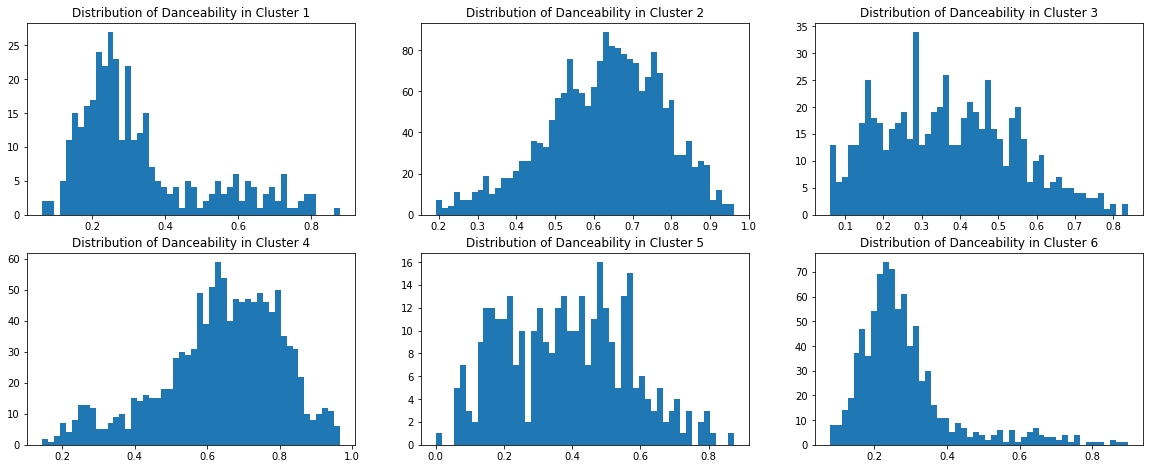

In [96]:
cluster_feature_distributions_plots(n_clusters, audio_features_df, 'danceability')

In [97]:
def cluster_features_distributions_plots(features, n_clusters, df):
  for feature in features:
    plt.figure(figsize=(20,12))
    for i in range(1, n_clusters + 1):
      plt.subplot(2,3,i)
      plt.hist(df[df['cluster'] == i][feature], bins=50)
      plt.title(f'Distribution of {feature} in Cluster {i}')

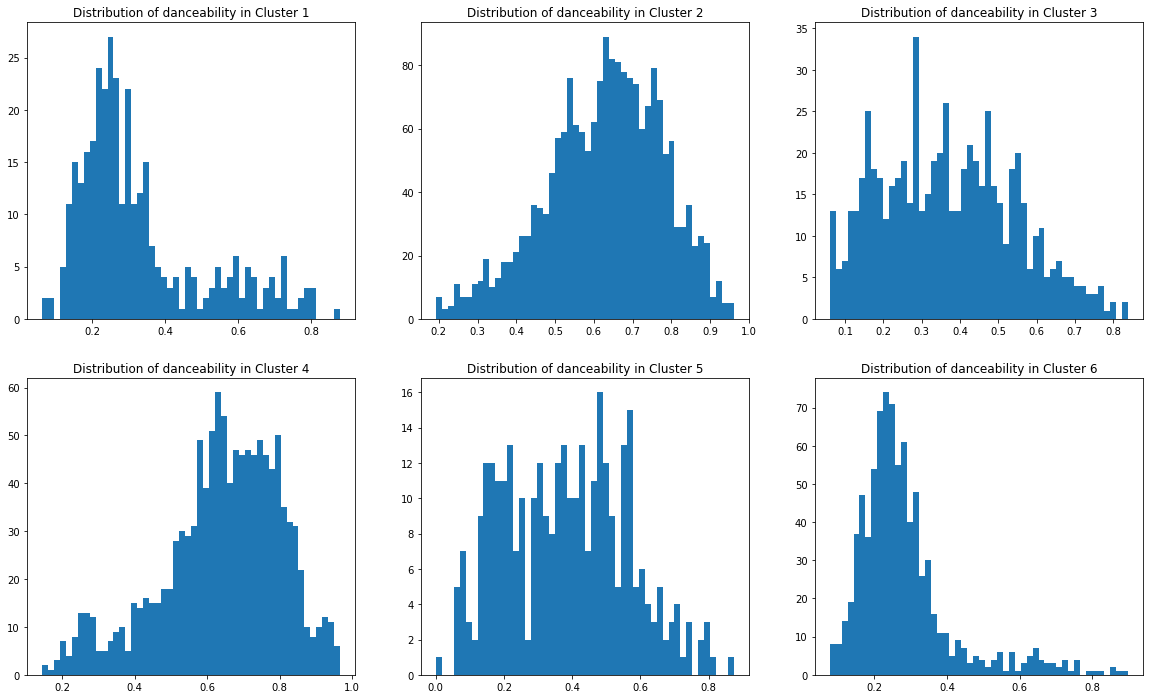

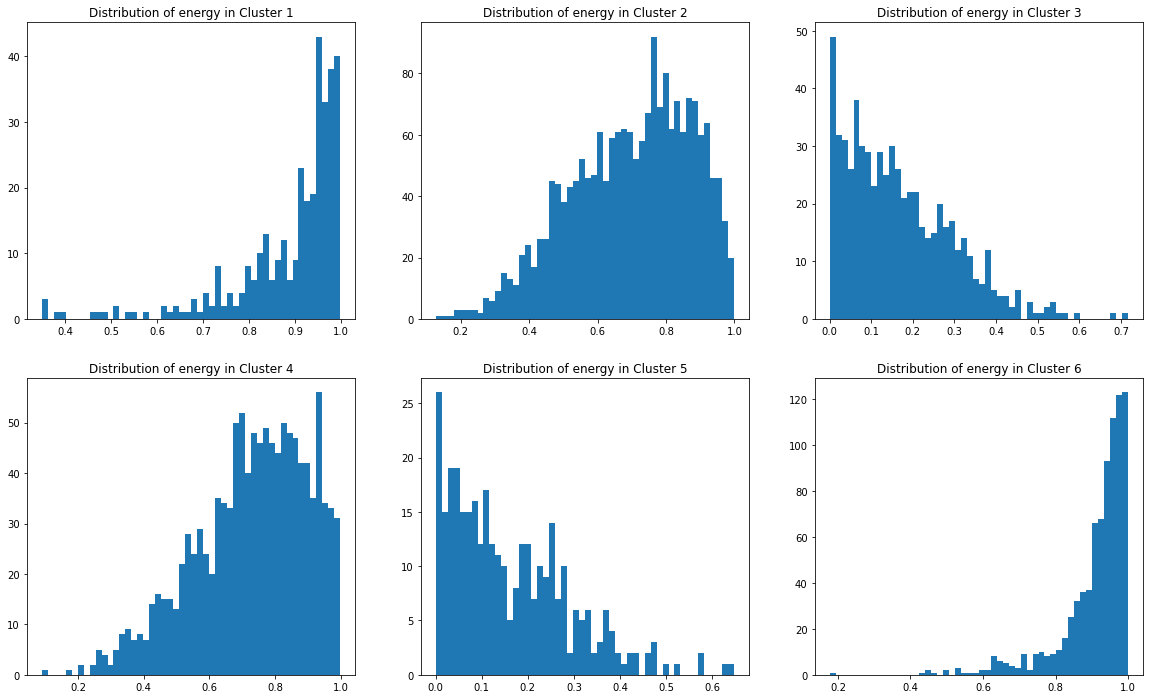

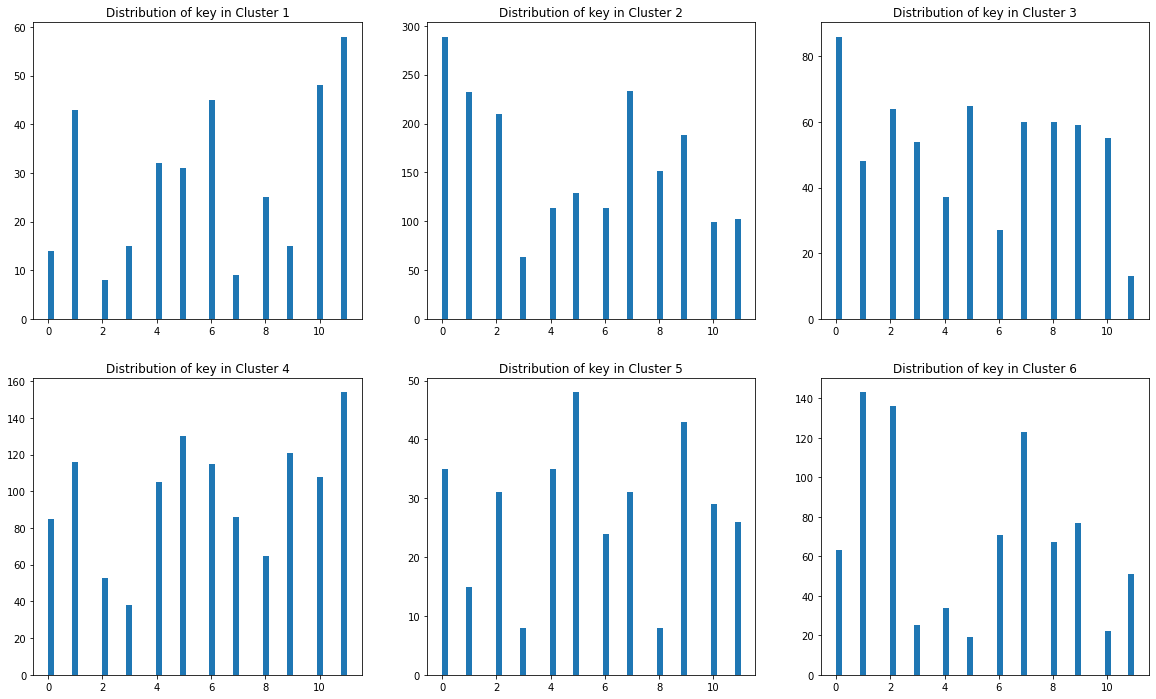

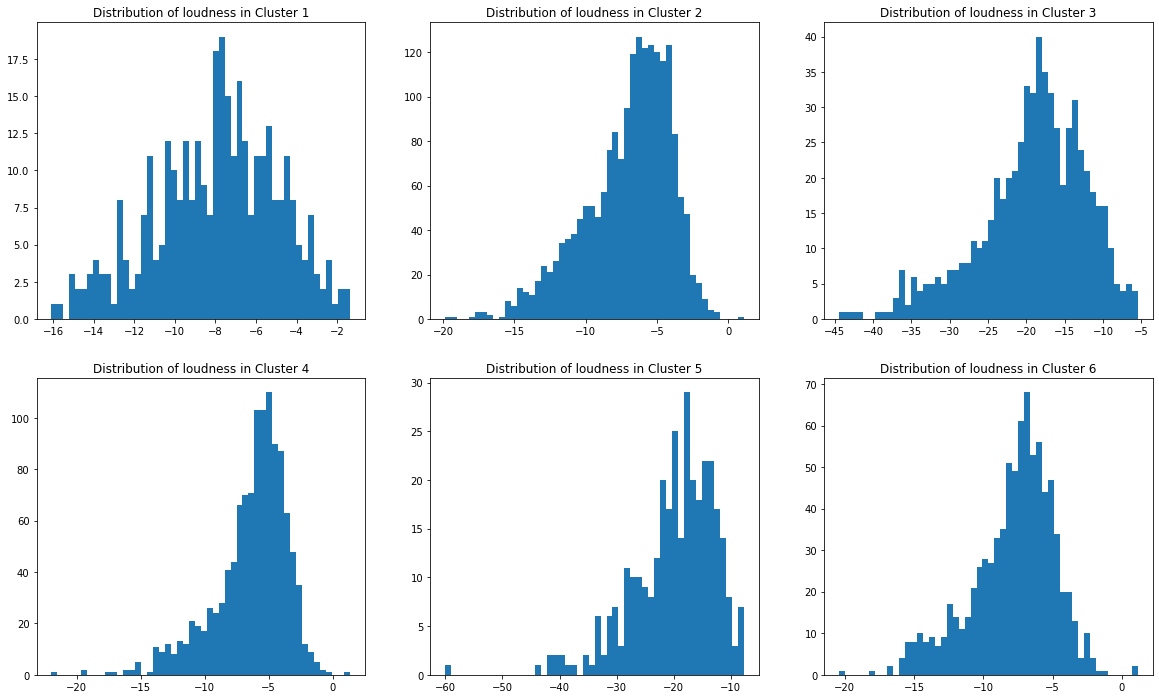

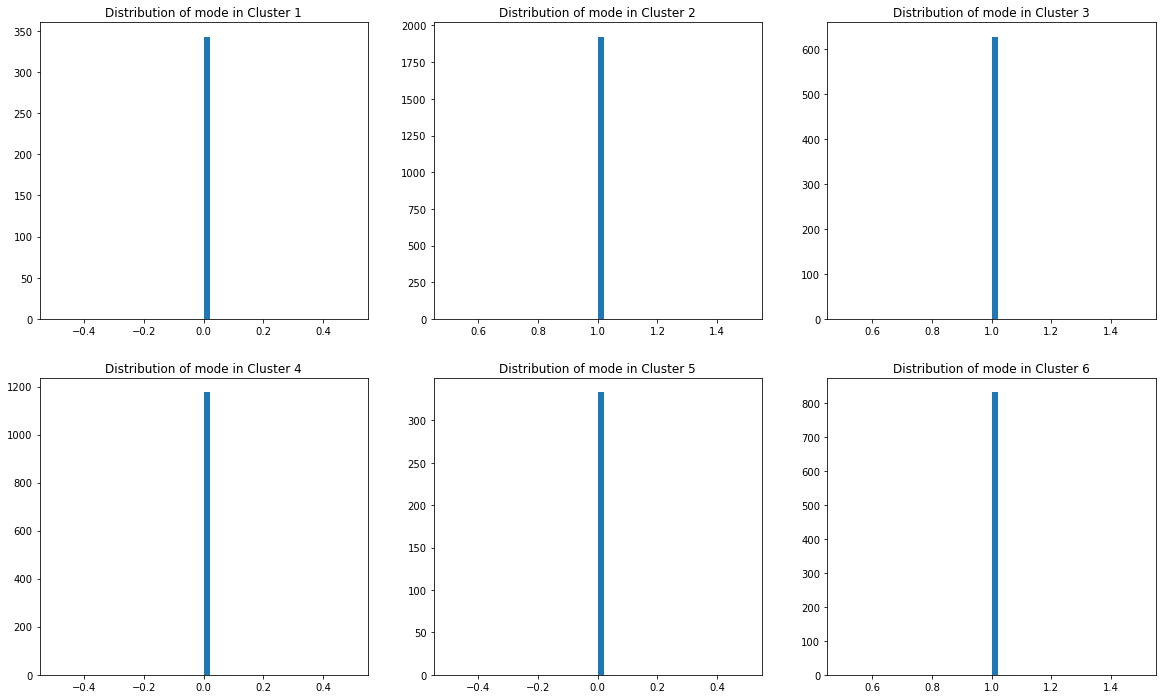

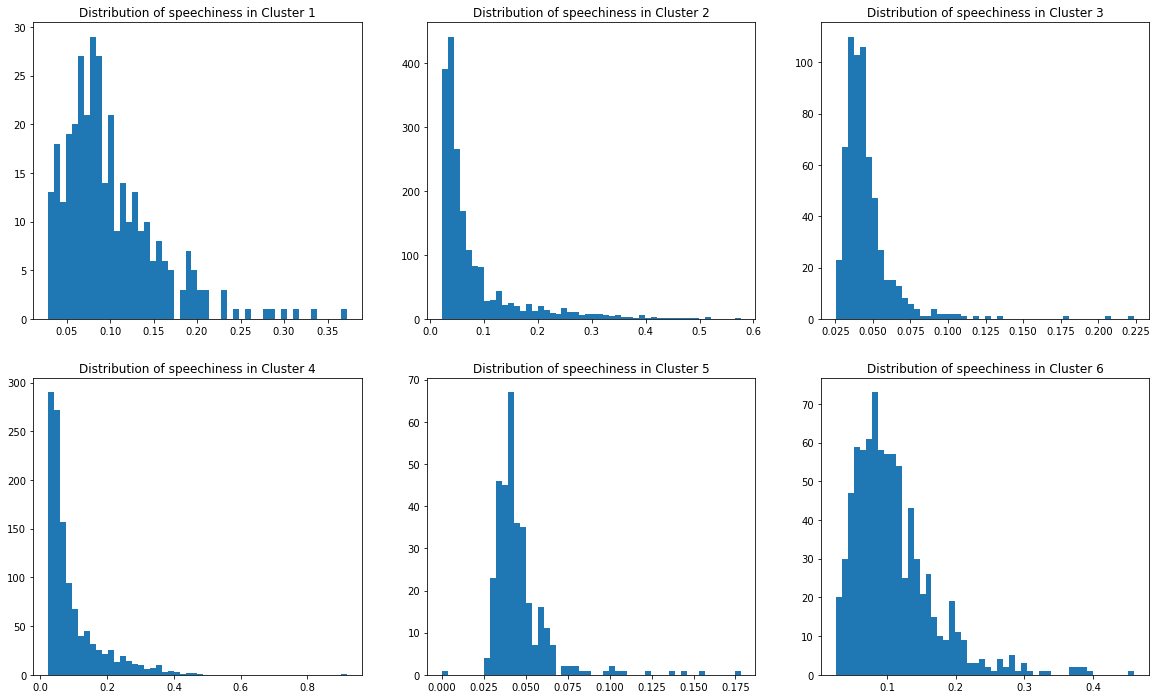

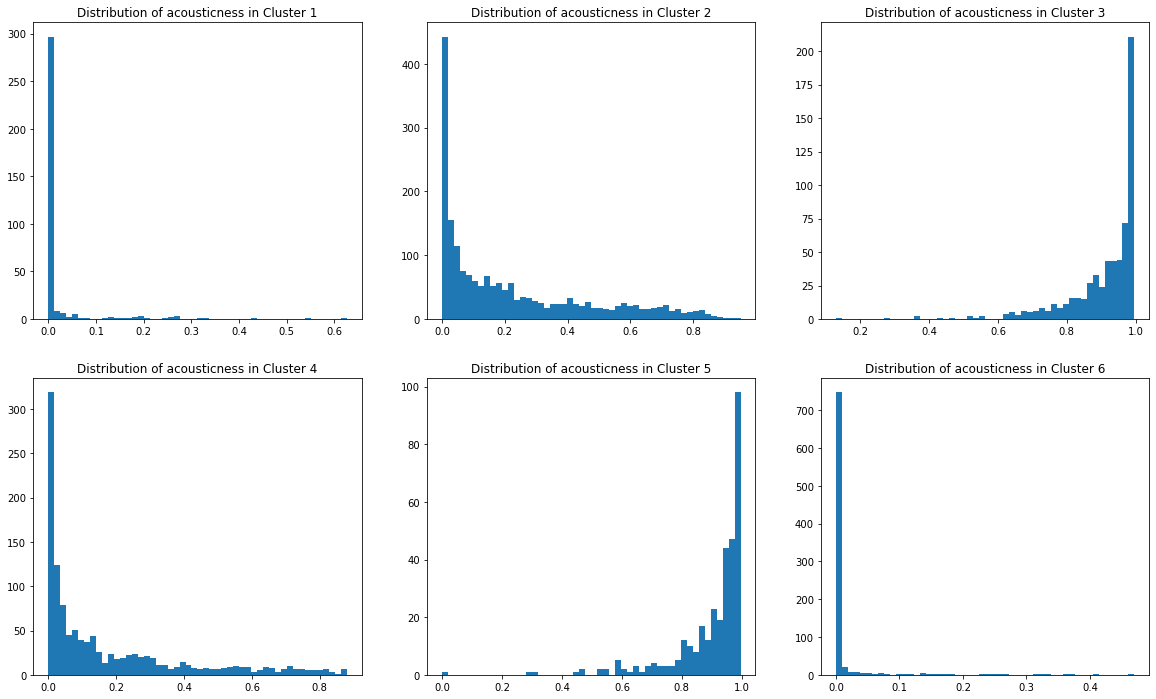

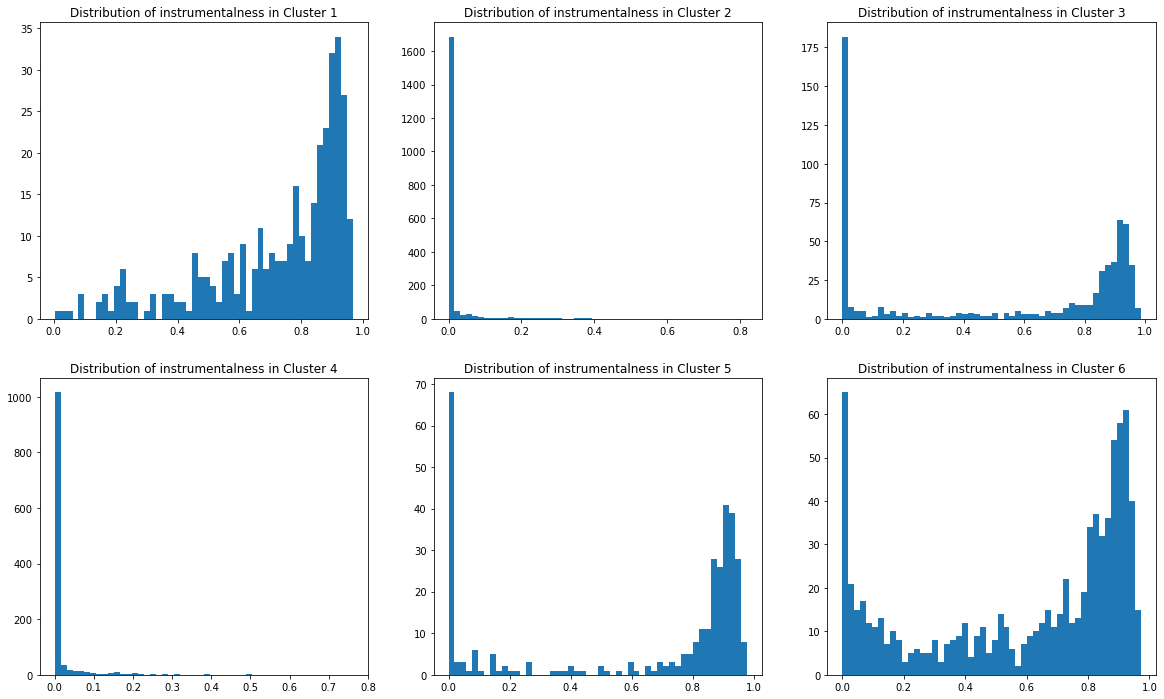

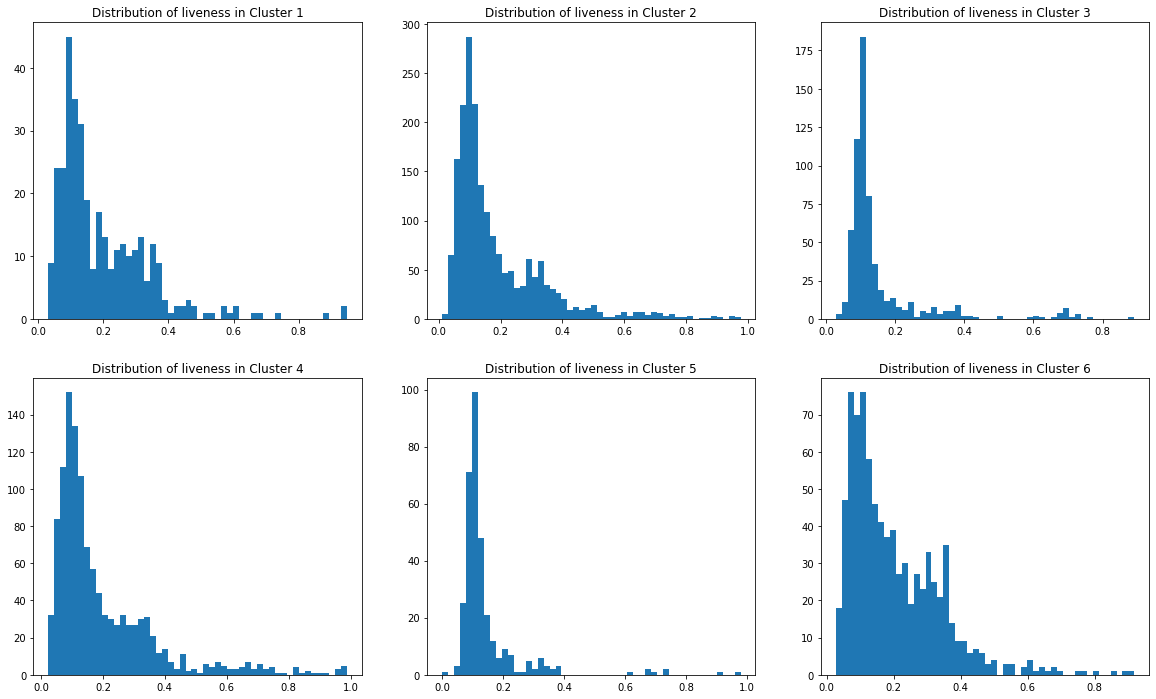

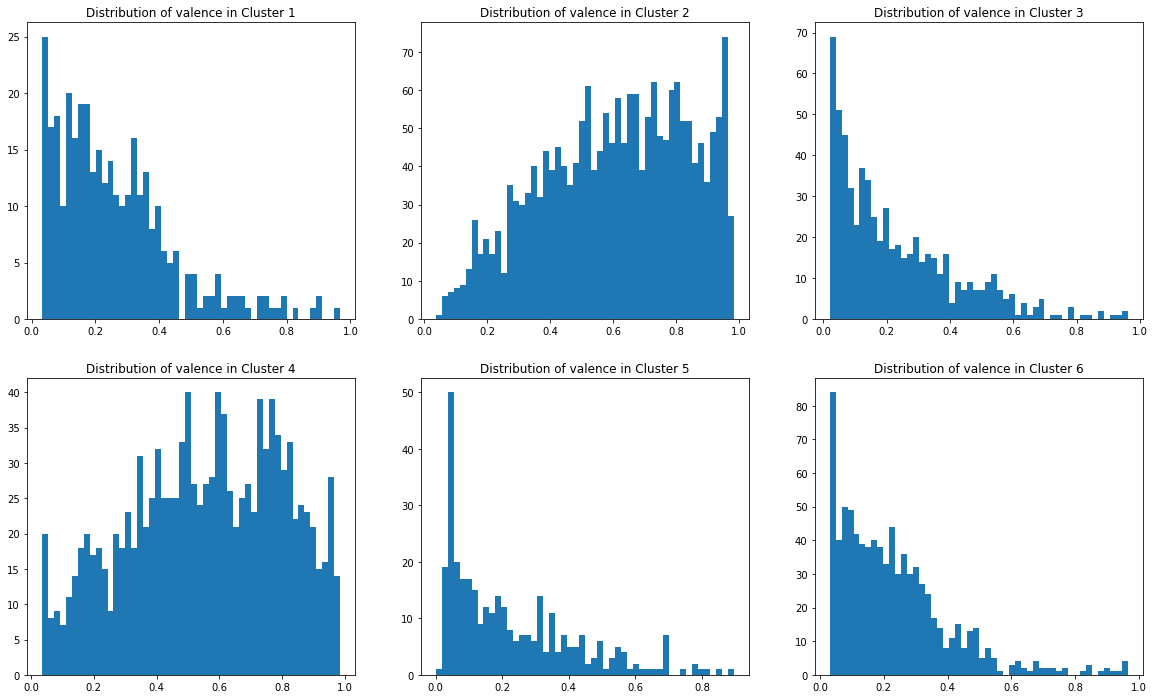

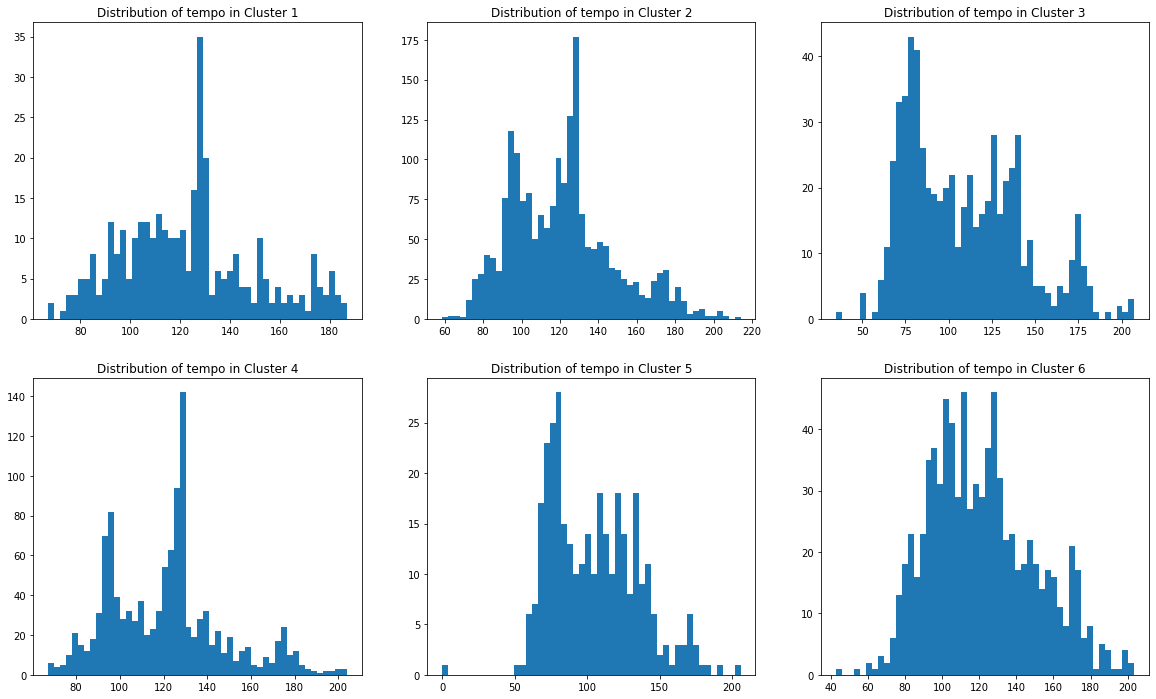

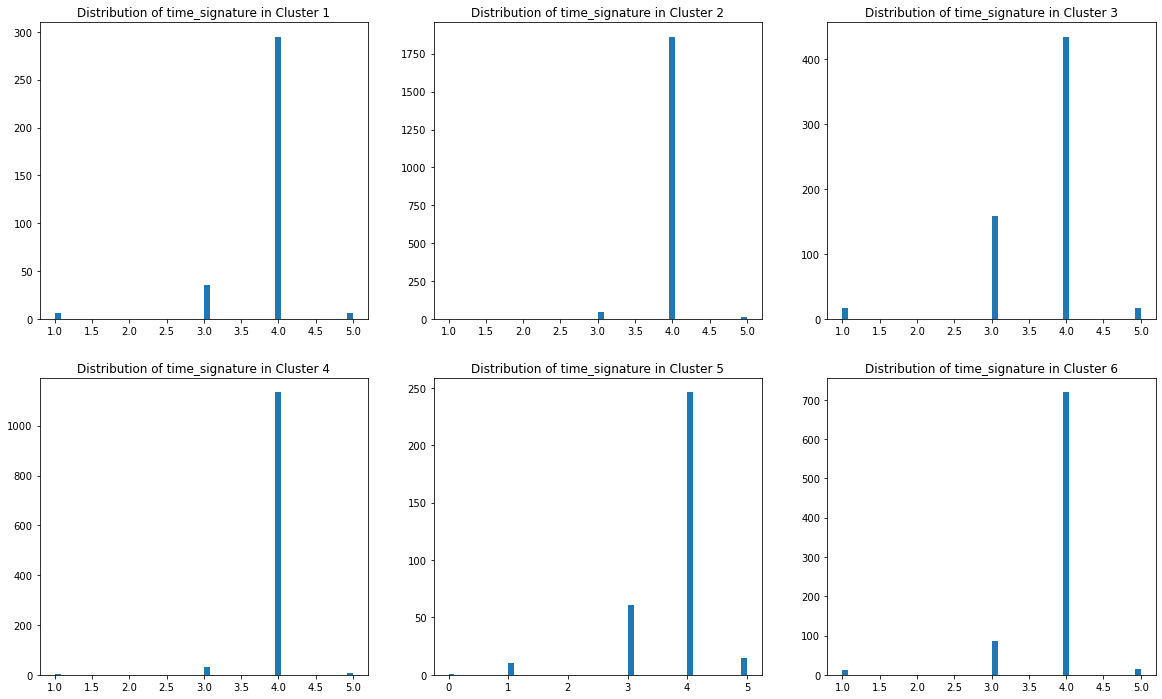

In [100]:
cluster_features_distributions_plots(features, n_clusters, audio_features_df)

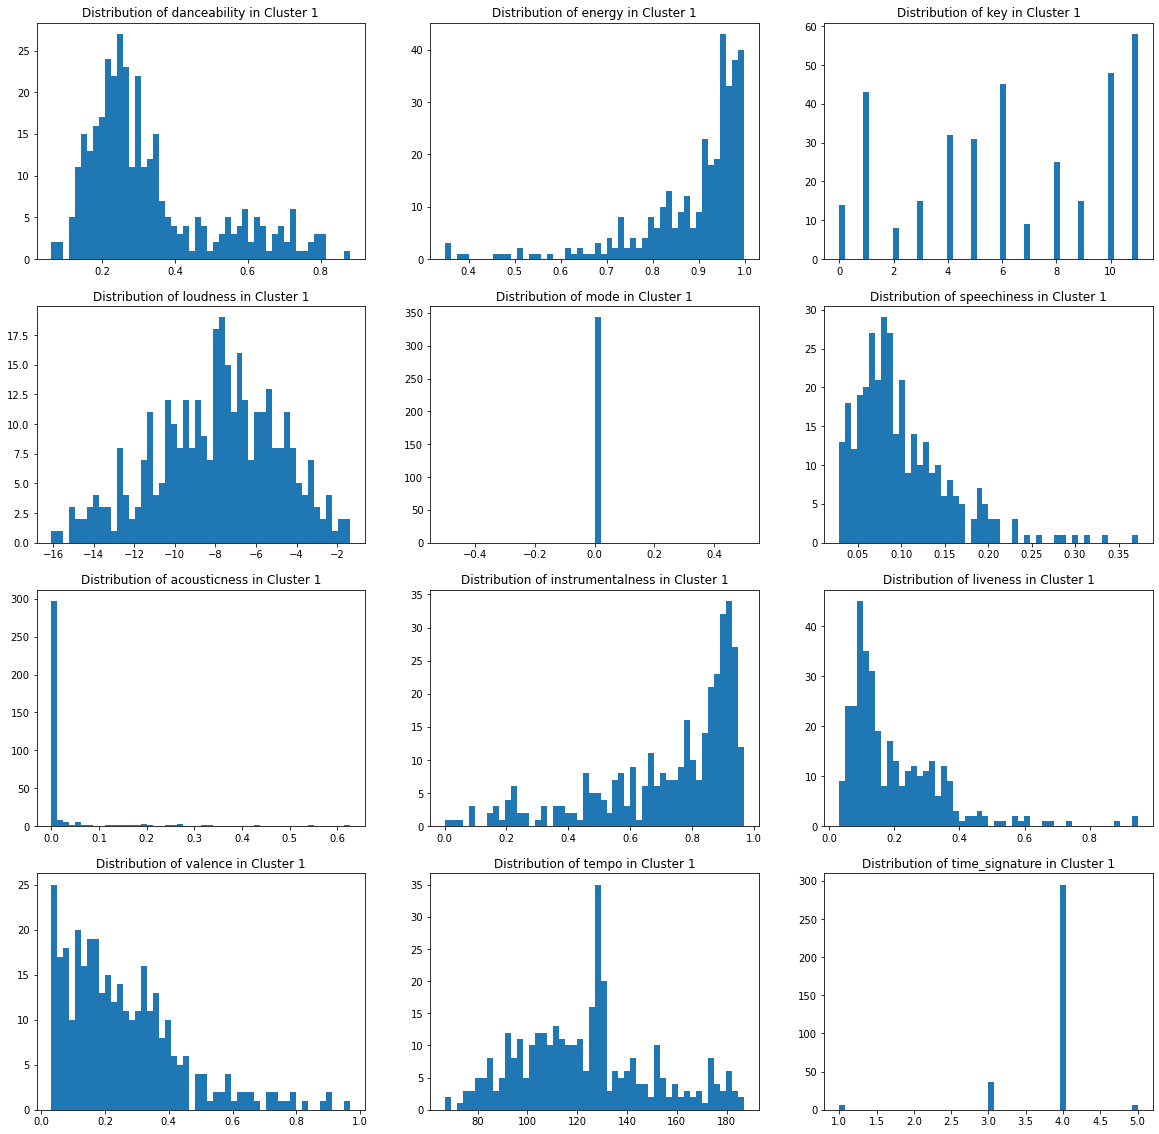

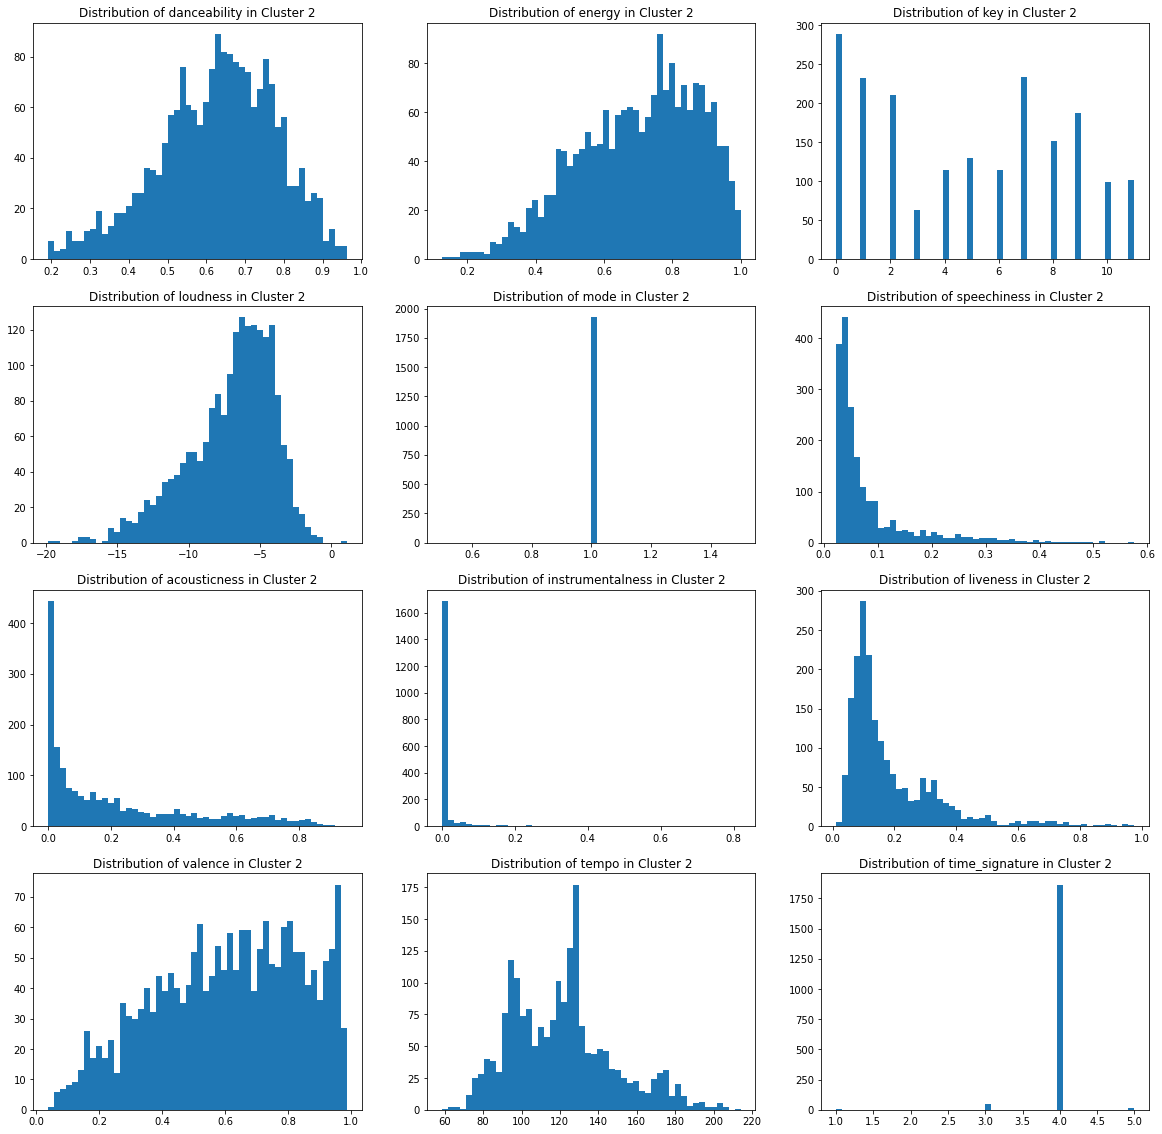

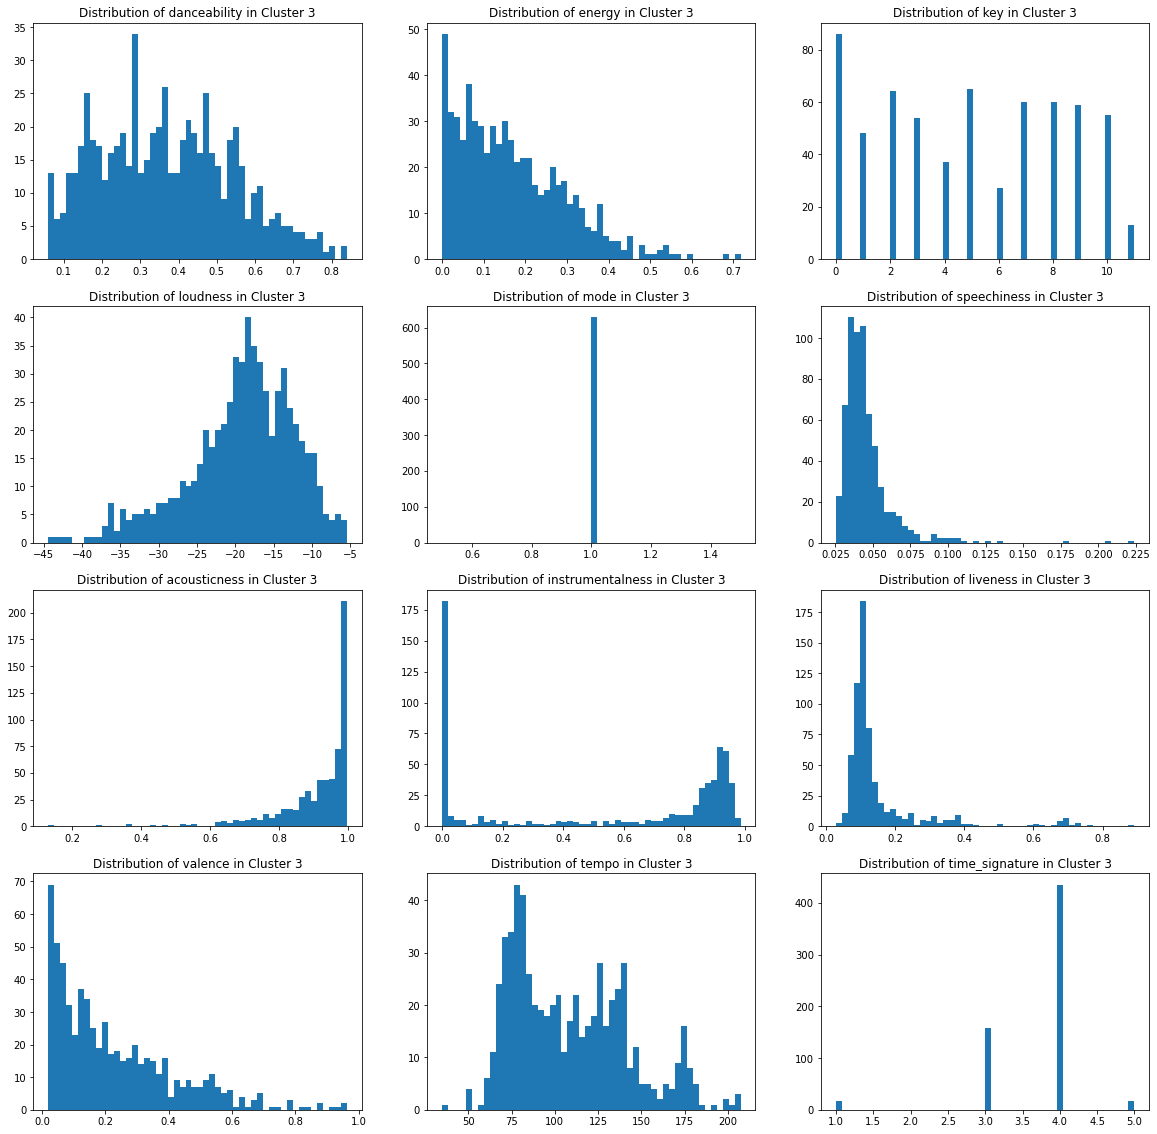

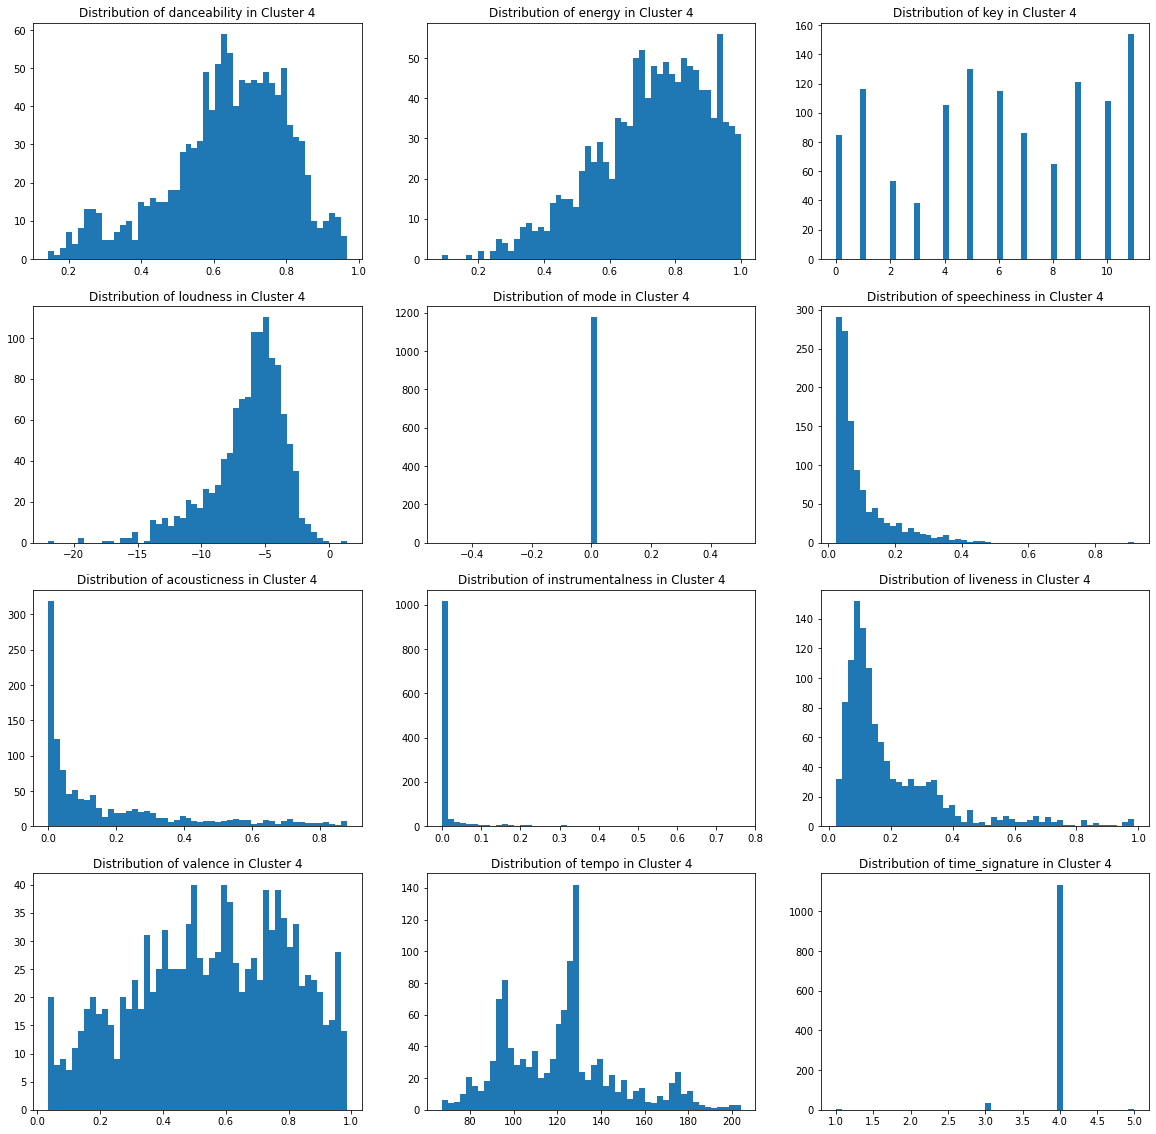

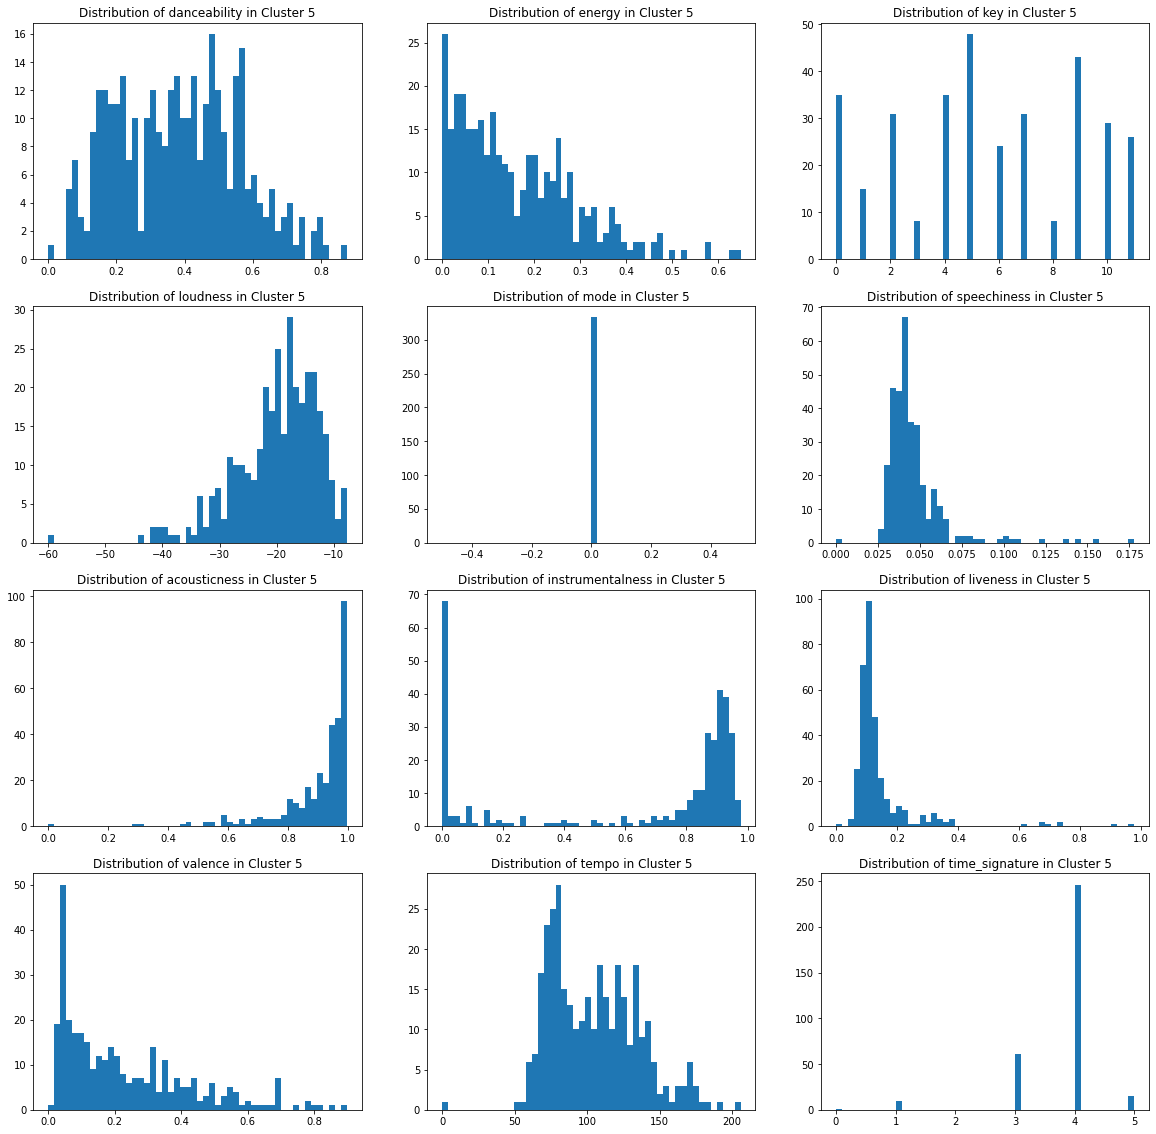

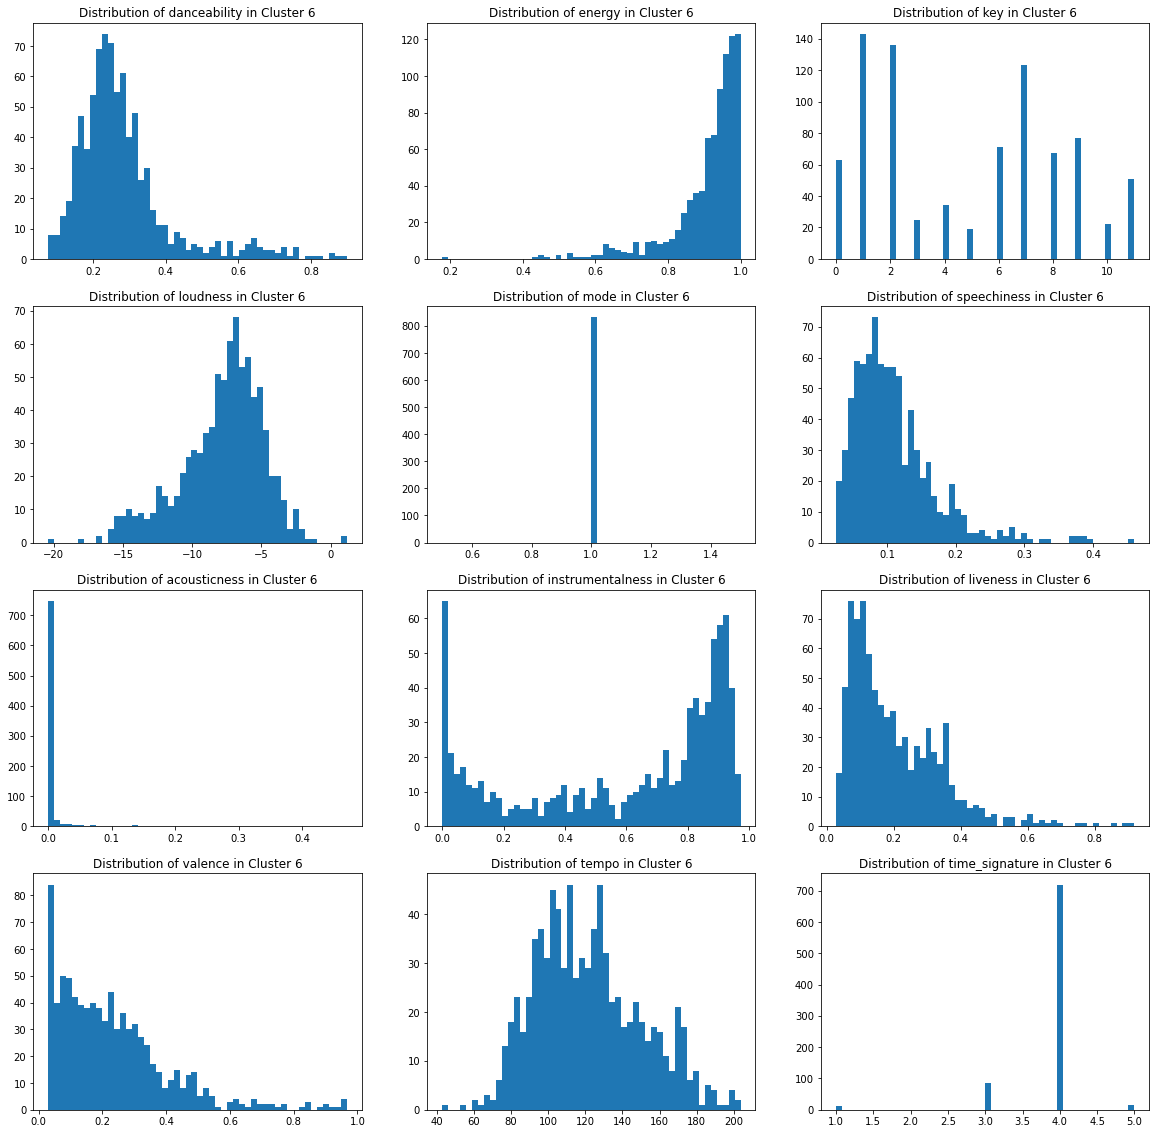

In [102]:
for n_cluster in range(1, n_clusters +1):
  plt.figure(figsize=(20,20))
  for i, feature in zip(range(1, len(features) + 1), features):
    plt.subplot(4,3,i)
    plt.hist(audio_features_df[audio_features_df['cluster'] == n_cluster][feature], bins=50)
    plt.title(f'Distribution of {feature} in Cluster {n_cluster}')

In [103]:
sc_audio_features_df = pd.DataFrame(X, index=audio_features_df.index, columns=audio_features_df[features].columns)
sc_audio_features_df['cluster'] = y_kmeans + 1

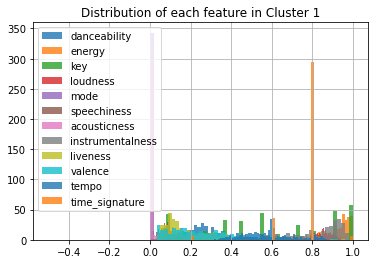

In [104]:
for feature in features:
  sc_audio_features_df[sc_audio_features_df['cluster'] == 1][feature].hist(bins=50, alpha=0.8)
  plt.legend(features)
  plt.title('Distribution of each feature in Cluster 1')

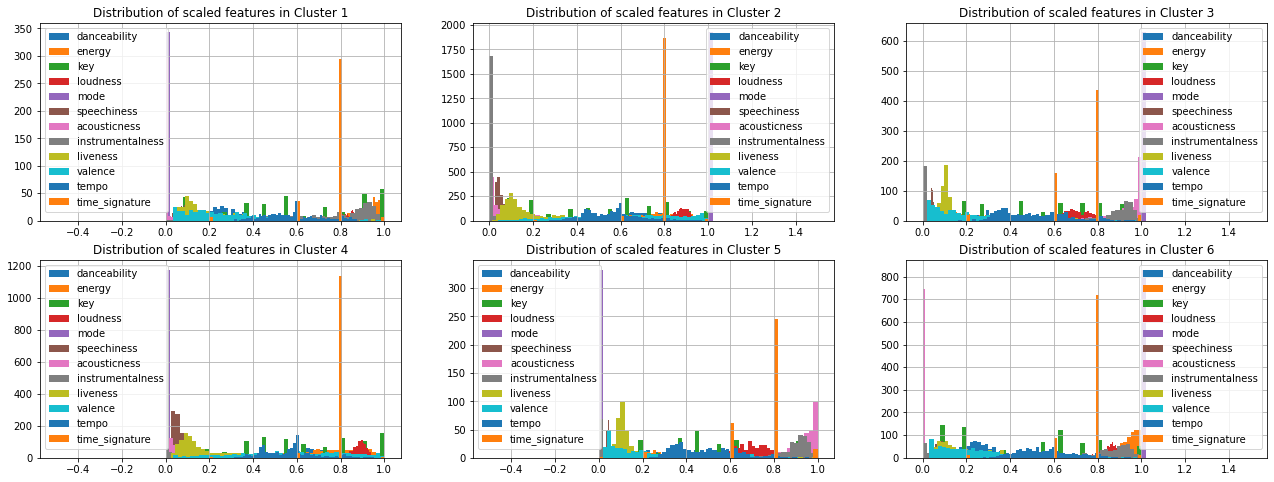

In [105]:
plt.figure(figsize=(22,8))
for n_cluster in range(1, n_clusters + 1):
  plt.subplot(2,3,n_cluster)
  for feature in features:
    sc_audio_features_df[sc_audio_features_df['cluster'] == n_cluster][feature].hist(bins=50)
    plt.legend(features)
    plt.title(f'Distribution of scaled features in Cluster {n_cluster}')

In [106]:
clusters_centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=features)

In [107]:
clusters_centroids_df['cluster'] = clusters_centroids_df.index + 1 

In [108]:
clusters_centroids_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,0.340176,0.888810,0.575934,0.848639,2.220446e-15,0.109792,0.020244,0.738450,0.200009,0.262348,0.574905,0.772012,1
1,0.649565,0.698669,0.437961,0.863579,1.000000e+00,0.087623,0.222609,0.019734,0.189627,0.617406,0.565593,0.795738,2
2,0.381896,0.167239,0.448321,0.665391,1.000000e+00,0.049660,0.913472,0.543450,0.153826,0.230885,0.506614,0.738535,3
3,0.661384,0.729309,0.547387,0.874932,1.110223e-16,0.103303,0.174882,0.019004,0.199278,0.563670,0.566443,0.793537,4
4,0.394916,0.162097,0.510238,0.653076,1.998401e-15,0.050078,0.903608,0.633785,0.145712,0.231172,0.488212,0.751952,5
5,0.292060,0.909313,0.439558,0.850395,1.000000e+00,0.118823,0.010839,0.603767,0.204795,0.234495,0.568127,0.774007,6


In [109]:
audio_features_df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,4,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,4,2
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,4,2
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,4,3
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,4,3


In [110]:
sc_audio_features_df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.8,4
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.8,2
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.8,2
Mulher Eu Sei,Chico César,0.729059,0.0502,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.8,3
Rosa Morena,Kurt Elling,0.673216,0.1190,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.8,3


In [111]:
from scipy.spatial import distance
# .euclidean, .cityblock

In [112]:
cluster_n_df_list = []
for i in range(n_clusters): 
  globals()[f'cluster_{i+1}_df'] = audio_features_df[audio_features_df['cluster'] == i + 1]
  cluster_n_df_list.append(globals()[f'cluster_{i+1}_df'])

In [113]:
for i in range(n_clusters): 
  globals()[f'cluster_{i+1}_sc_df'] = sc_audio_features_df[sc_audio_features_df['cluster'] == i + 1]

In [114]:
def cluster_eucl_dists(cluster_n_df, clusters_centroids_df):
  dists = []
  for i in range(len(cluster_n_df)):
    dist = distance.euclidean(clusters_centroids_df.loc[cluster_n_df['cluster'].unique()[0]-1,:], cluster_n_df.iloc[i,:])
    dists.append(dist)
  return dists

In [115]:
def cluster_manh_dists(cluster_n_df, clusters_centroids_df):
  dists = []
  for i in range(len(cluster_n_df)):
    dist = distance.cityblock(clusters_centroids_df.loc[cluster_n_df['cluster'].unique()[0]-1,:], cluster_n_df.iloc[i,:])
    dists.append(dist)
  return dists

In [116]:
def add_dists_col(cluster_n_df_list, clusters_centroids_df):
  for i in range(len(cluster_n_df_list)):
    globals()[f'cluster_{i+1}_eucl_dists'] = cluster_eucl_dists(globals()[f'cluster_{i+1}_sc_df'], clusters_centroids_df)
    cluster_n_df_list[i]['eucl_dist'] = globals()[f'cluster_{i+1}_eucl_dists']

    globals()[f'cluster_{i+1}_manh_dists'] = cluster_manh_dists(globals()[f'cluster_{i+1}_sc_df'], clusters_centroids_df)
    cluster_n_df_list[i]['manh_dist'] = globals()[f'cluster_{i+1}_manh_dists']
  

In [117]:
add_dists_col(cluster_n_df_list, clusters_centroids_df)

<ipython-input-116-c348a18f1626>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_n_df_list[i]['eucl_dist'] = globals()[f'cluster_{i+1}_eucl_dists']
<ipython-input-116-c348a18f1626>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_n_df_list[i]['manh_dist'] = globals()[f'cluster_{i+1}_manh_dists']


In [118]:
clustered_df = pd.concat(cluster_n_df_list)

In [120]:
final_df = clustered_df.join(dataset.iloc[:,-2:])

# Creating and adding playlists in spotify

In [128]:
# pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyOAuth
# import json

## Defining the functions
* Creating empty playlists
* Ddding tracks to the playlists


In [133]:
def create_playlist(token, spotifyObject):

    playlist_name = input('Enter a playlist name:')
    playlist_description = input('Enter a playlist description:')

    return spotifyObject.user_playlist_create(user=username, name=playlist_name, public=True, description=playlist_description)


In [123]:
def add_tracks(cluster_n, n_tracks):
    # user_input = input('Enter the song:')
    list_of_songs = final_df[final_df['cluster'] == cluster_n].sort_values('eucl_dist').head(n_tracks)['html'].tolist()

    prePlaylist = spotifyObject.user_playlists(user=username)
    playlist = prePlaylist['items'][0]['id']

    return spotifyObject.user_playlist_add_tracks(user=username, playlist_id=playlist, tracks=list_of_songs)

## Connecting to Spotify API

In [2]:
# import api keys
from keys import *

In [3]:
# username = ''
# scope = 'playlist-modify-public'
# client_id = ''
# client_secret = ''
# redirect_uri = ''

In [134]:
token = SpotifyOAuth(scope=scope, username=username, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)
spotifyObject = spotipy.Spotify(auth_manager=token)

## Creating cluster 1 playlist

In [135]:
create_playlist(token, spotifyObject)
add_tracks(1,20)

Enter a playlist name:c1
Enter a playlist description:c1


{'snapshot_id': 'MywzZjhlMDY3M2ViZTFjMTMwYzkxMTc1NWMzYjEzY2I3NGI5ZTgwN2Nk'}

## Creating the rest of the clusters playlists

In [139]:
for i in range(2, n_clusters+1):
    create_playlist(token, spotifyObject)
    add_tracks(i,20)

Enter a playlist name:c2
Enter a playlist description:c2
Enter a playlist name:c3
Enter a playlist description:c3
Enter a playlist name:c4
Enter a playlist description:c4
Enter a playlist name:c5
Enter a playlist description:c5
Enter a playlist name:c6
Enter a playlist description:c6
